### <span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#D68910"> Problem 1 - Bank Marketing Clustering

#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#424949"> A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore                                        # ZSCORE SCALING
from sklearn.preprocessing import StandardScaler                 # ZScore

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, centroid          # HIERARCHICAL CLUSTERING 
from sklearn.cluster import KMeans                                    # K-MEANS CLUSTERING

from sklearn.metrics import silhouette_samples, silhouette_score      # SILHOUETTE SCORE FOR K-MEANS

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(color_codes=True)
sns.set_palette('Accent_r')

%config InlineBackend.figure_format ='retina'

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Load and Explore Dataset

In [2]:
bank = pd.read_csv('bank_marketing_clustering.csv')
bank.head(10).to_csv('bank_head.csv')
bank.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273
9,11.23,12.88,0.8511,5.140,2.795,4.325,5.003


### **Data Dictionary for Market Segmentation:**

  * `spending`: Amount spent by the customer per month (in 1000s)
  * `advance_payments`: Amount paid by the customer in advance by cash (in 100s)
  * `probability_of_full_payment`: Probability of payment done in full by the customer to the bank
  * `current_balance`: Balance amount left in the account to make purchases (in 1000s)
  * `credit_limit`: Limit of the amount in credit card (10000s)
  * `min_payment_amt` : minimum paid by the customer while making payments for purchases made monthly (in 100s)
  * `max_spent_in_single_shopping`: Maximum amount spent in one purchase (in 1000s)


In [3]:
bank.shape

(210, 7)

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [5]:
bank.describe().T.to_csv('bank_describe.csv')
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [6]:
col=bank.columns
for i in range(0, len(col)):
    print('{}  -------->       Mean = {},    Median = {},    CV = {}'.format(col[i], round(bank[col[i]].mean(), 2), round(bank[col[i]].median(), 2), round(bank[col[i]].std()*100/bank[col[i]].mean(), 2)))

spending  -------->       Mean = 14.85,    Median = 14.36,    CV = 19.6
advance_payments  -------->       Mean = 14.56,    Median = 14.32,    CV = 8.97
probability_of_full_payment  -------->       Mean = 0.87,    Median = 0.87,    CV = 2.71
current_balance  -------->       Mean = 5.63,    Median = 5.52,    CV = 7.87
credit_limit  -------->       Mean = 3.26,    Median = 3.24,    CV = 11.59
min_payment_amt  -------->       Mean = 3.7,    Median = 3.6,    CV = 40.63
max_spent_in_single_shopping  -------->       Mean = 5.41,    Median = 5.22,    CV = 9.09


### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Check for Duplicates

In [7]:
bank_dups = bank.duplicated()
sum(bank_dups)

0

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Check for Null Values

In [8]:
bank.isna().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [9]:
print('Number of Missing values =' ,bank.isna().sum().sum())

Number of Missing values = 0


### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> EDA

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#D68910"> Check for Outliers

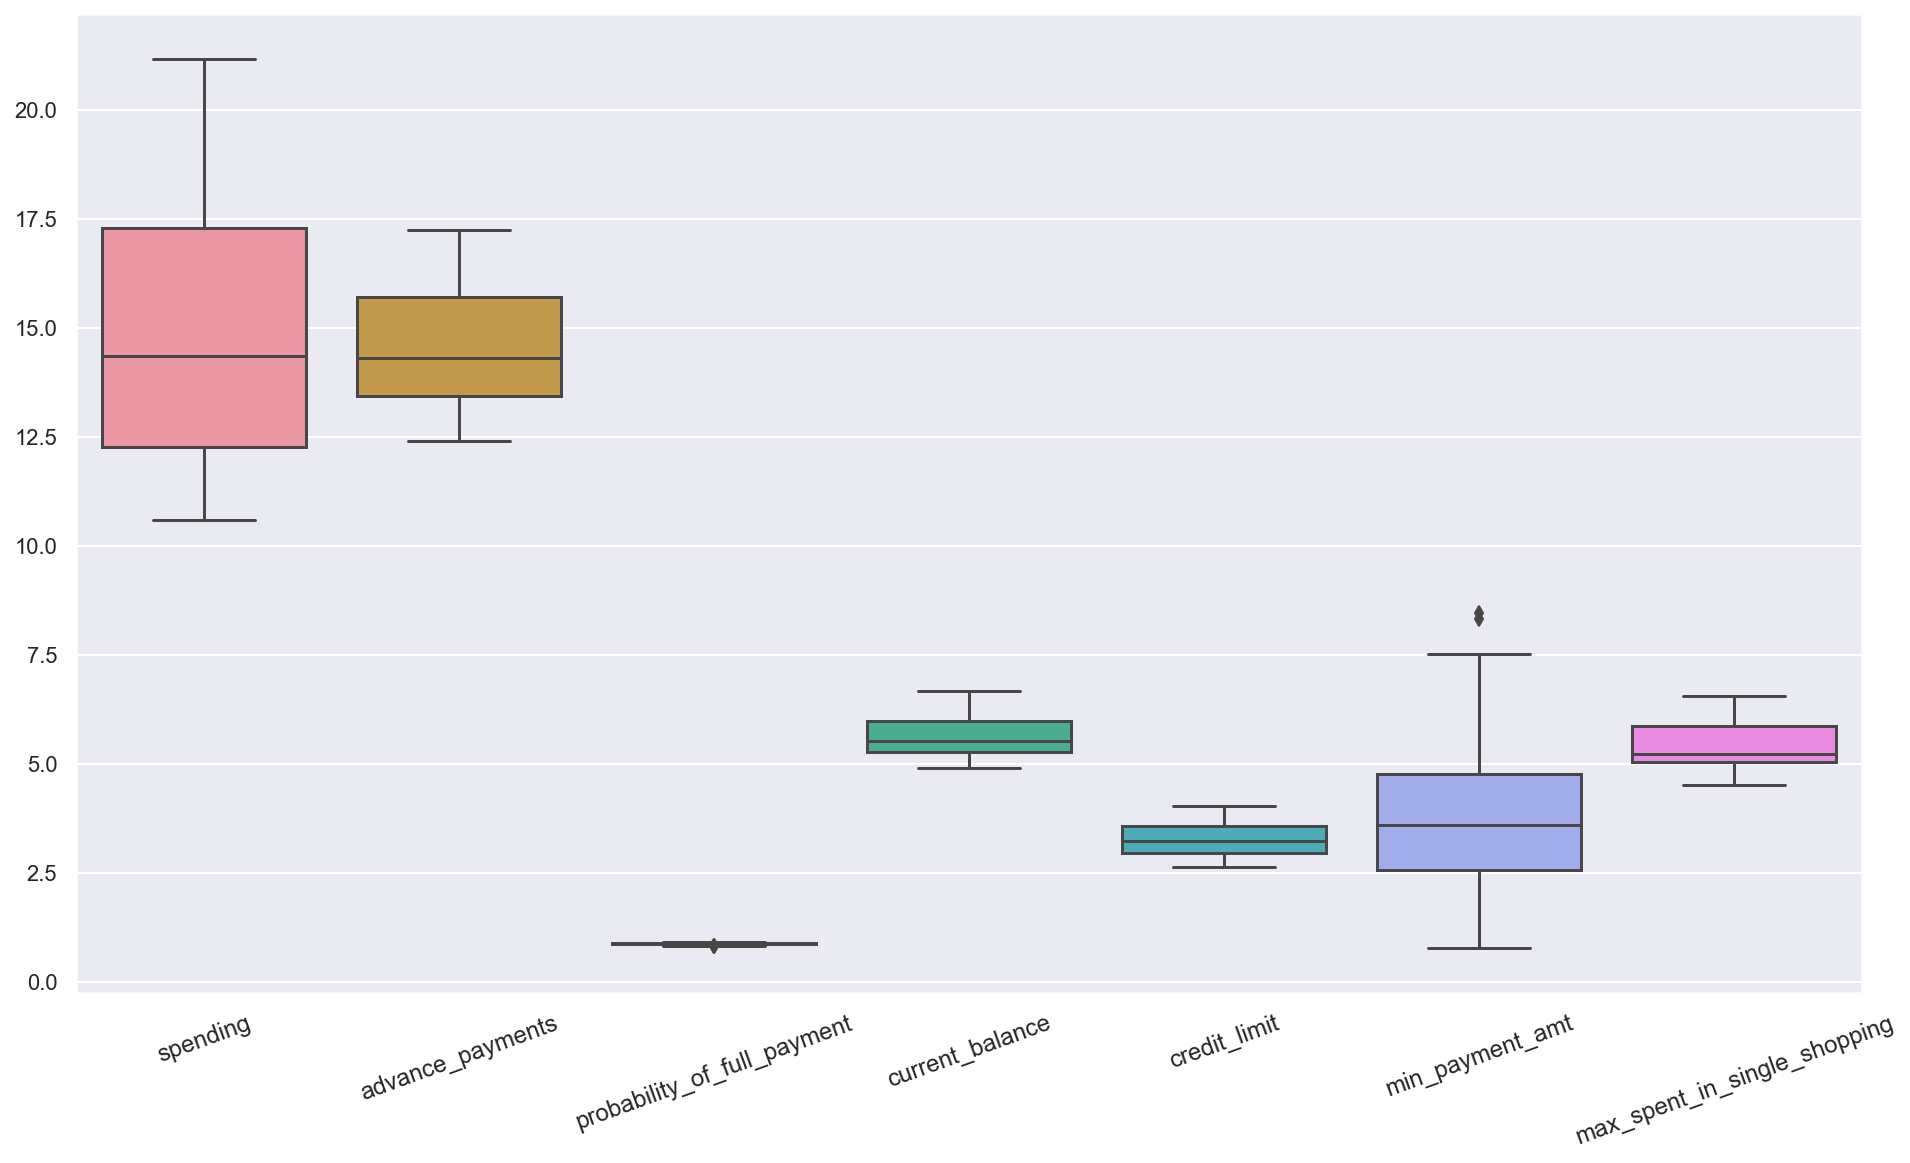

In [10]:
plt.figure(figsize=[16,9]);

a = sns.boxplot(data=bank);
a.set_xticklabels(bank.columns,rotation = 20, fontsize=12);
plt.savefig('bank_outlier.jpg', bbox_inches='tight');

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#D68910"> Check Distribution of each variable

Text(0.5, 1.0, 'spending Distribution')

Text(0.5, 1.0, 'spending Distribution')

Text(0.5, 1.0, 'advance_payments Distribution')

Text(0.5, 1.0, 'advance_payments Distribution')

Text(0.5, 1.0, 'probability_of_full_payment Distribution')

Text(0.5, 1.0, 'probability_of_full_payment Distribution')

Text(0.5, 1.0, 'current_balance Distribution')

Text(0.5, 1.0, 'current_balance Distribution')

Text(0.5, 1.0, 'credit_limit Distribution')

Text(0.5, 1.0, 'credit_limit Distribution')

Text(0.5, 1.0, 'min_payment_amt Distribution')

Text(0.5, 1.0, 'min_payment_amt Distribution')

Text(0.5, 1.0, 'max_spent_in_single_shopping Distribution')

Text(0.5, 1.0, 'max_spent_in_single_shopping Distribution')

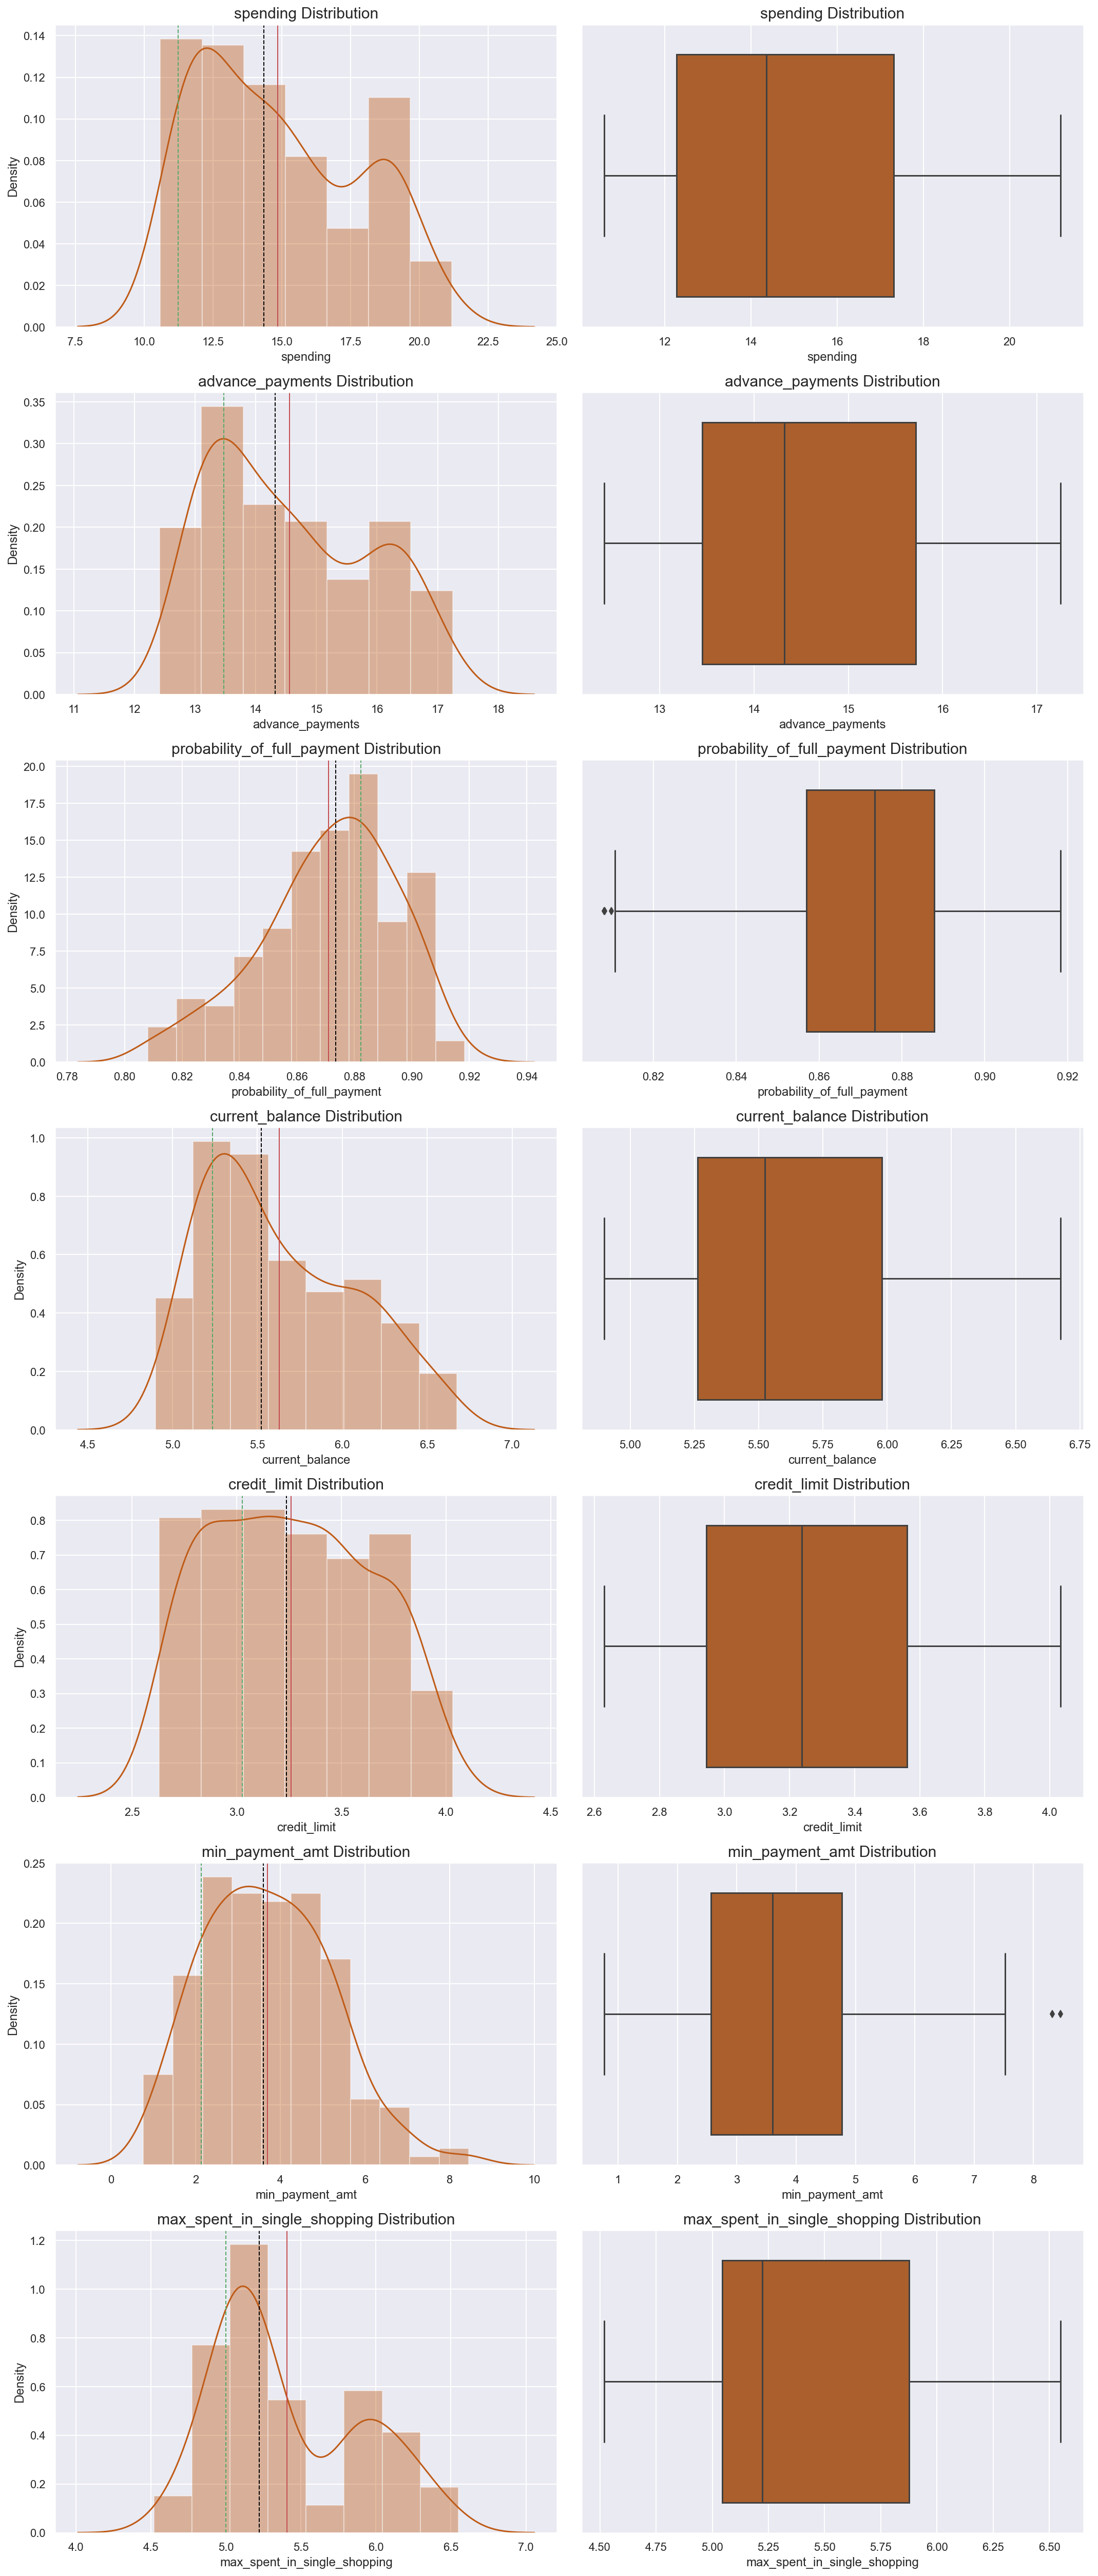

In [11]:
fig, axes = plt.subplots(nrows=7,ncols=2);

fig.set_size_inches(15, 35);

for i in range(0, len(col)):
    a = sns.distplot(bank[col[i]], ax=axes[i][0]);
    a.set_title('{} Distribution'.format(col[i]), fontsize=15);
    
    a.axvline(bank[col[i]].mean(), color='r', linewidth=1);
    a.axvline(bank[col[i]].median(), color='black', linestyle='dashed', linewidth=1);
    a.axvline(bank[col[i]].mode()[0], color='g', linestyle='dashed', linewidth=1);
    
    a = sns.boxplot(bank[col[i]], orient = "v" , ax=axes[i][1]);
    a.set_title('{} Distribution'.format(col[i]), fontsize=15);
    plt.tight_layout();

plt.savefig('bank_Distribution.jpg', bbox_inches='tight')

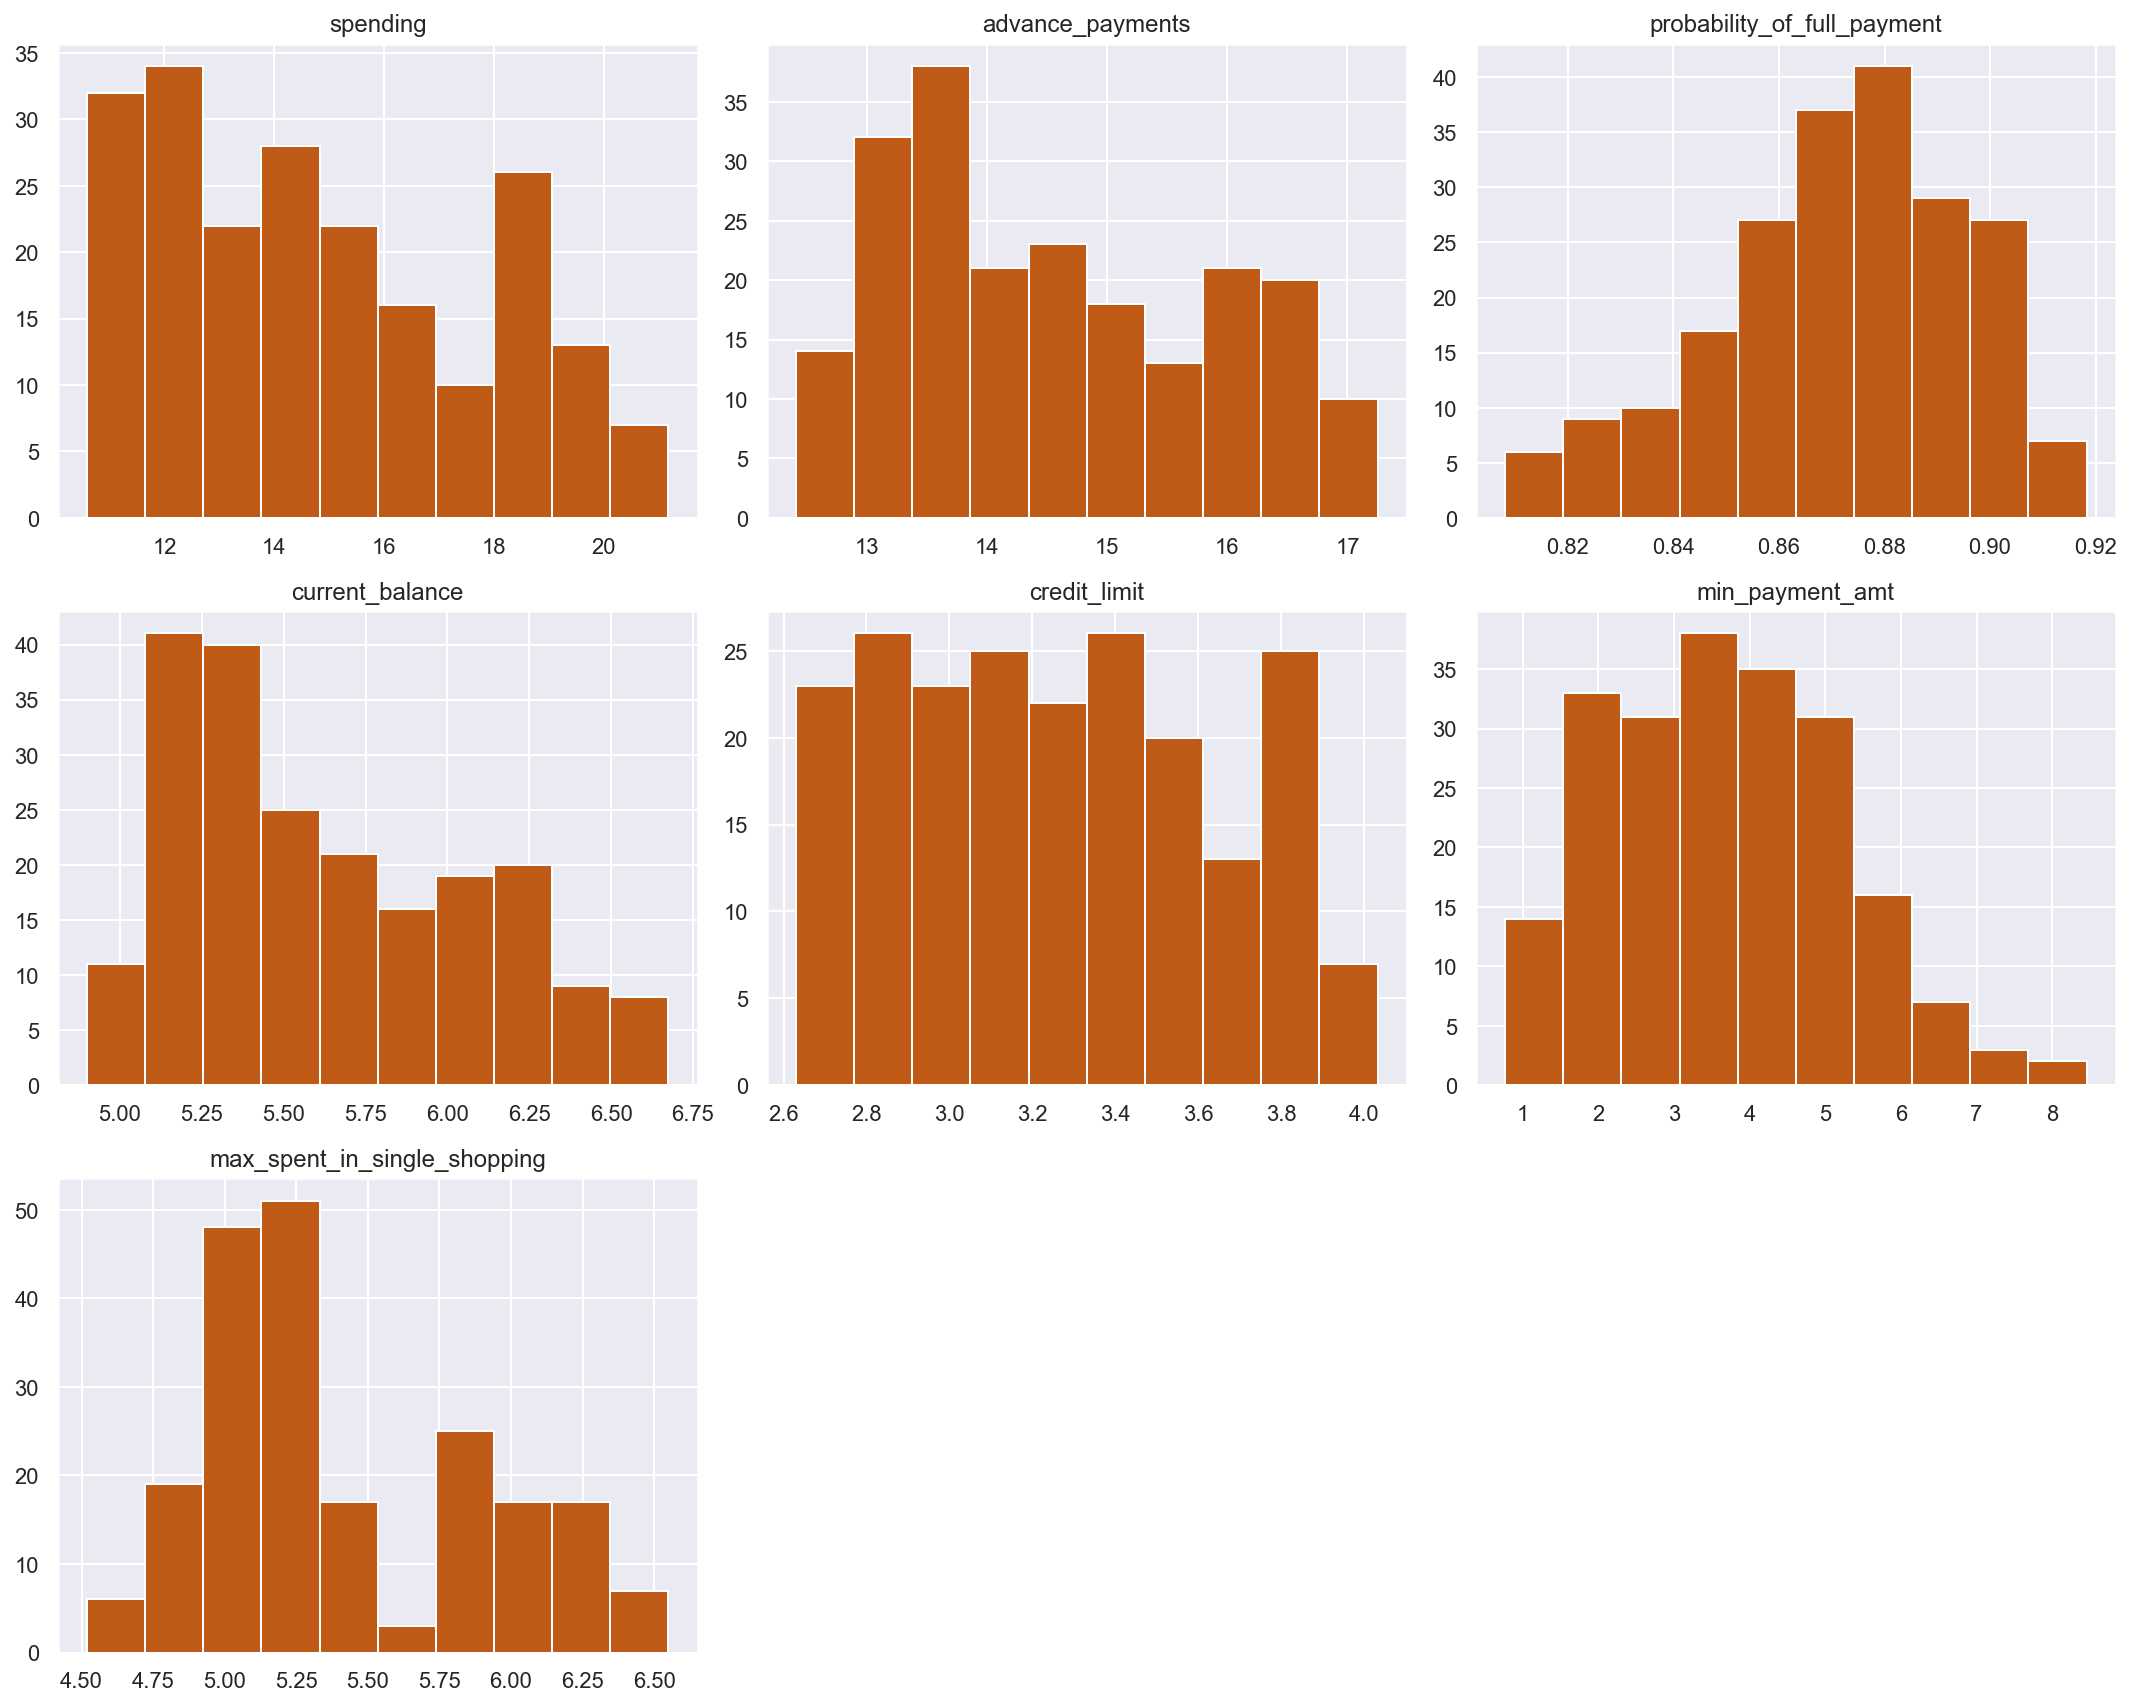

In [12]:

fig = plt.figure(figsize = (15,12)) 
ax = fig.gca()
bank.hist(ax=ax)

plt.tight_layout()
plt.show();

# import scipy
# kde = stats.gaussian_kde(x)
# xx = np.linspace(0, 9, 1000)
# fig, ax = plt.subplots(figsize=(8,6))
# ax.hist(x, normed=True, bins=bins, alpha=0.3)
# ax.plot(xx, kde(xx))

In [13]:
col

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping'],
      dtype='object')

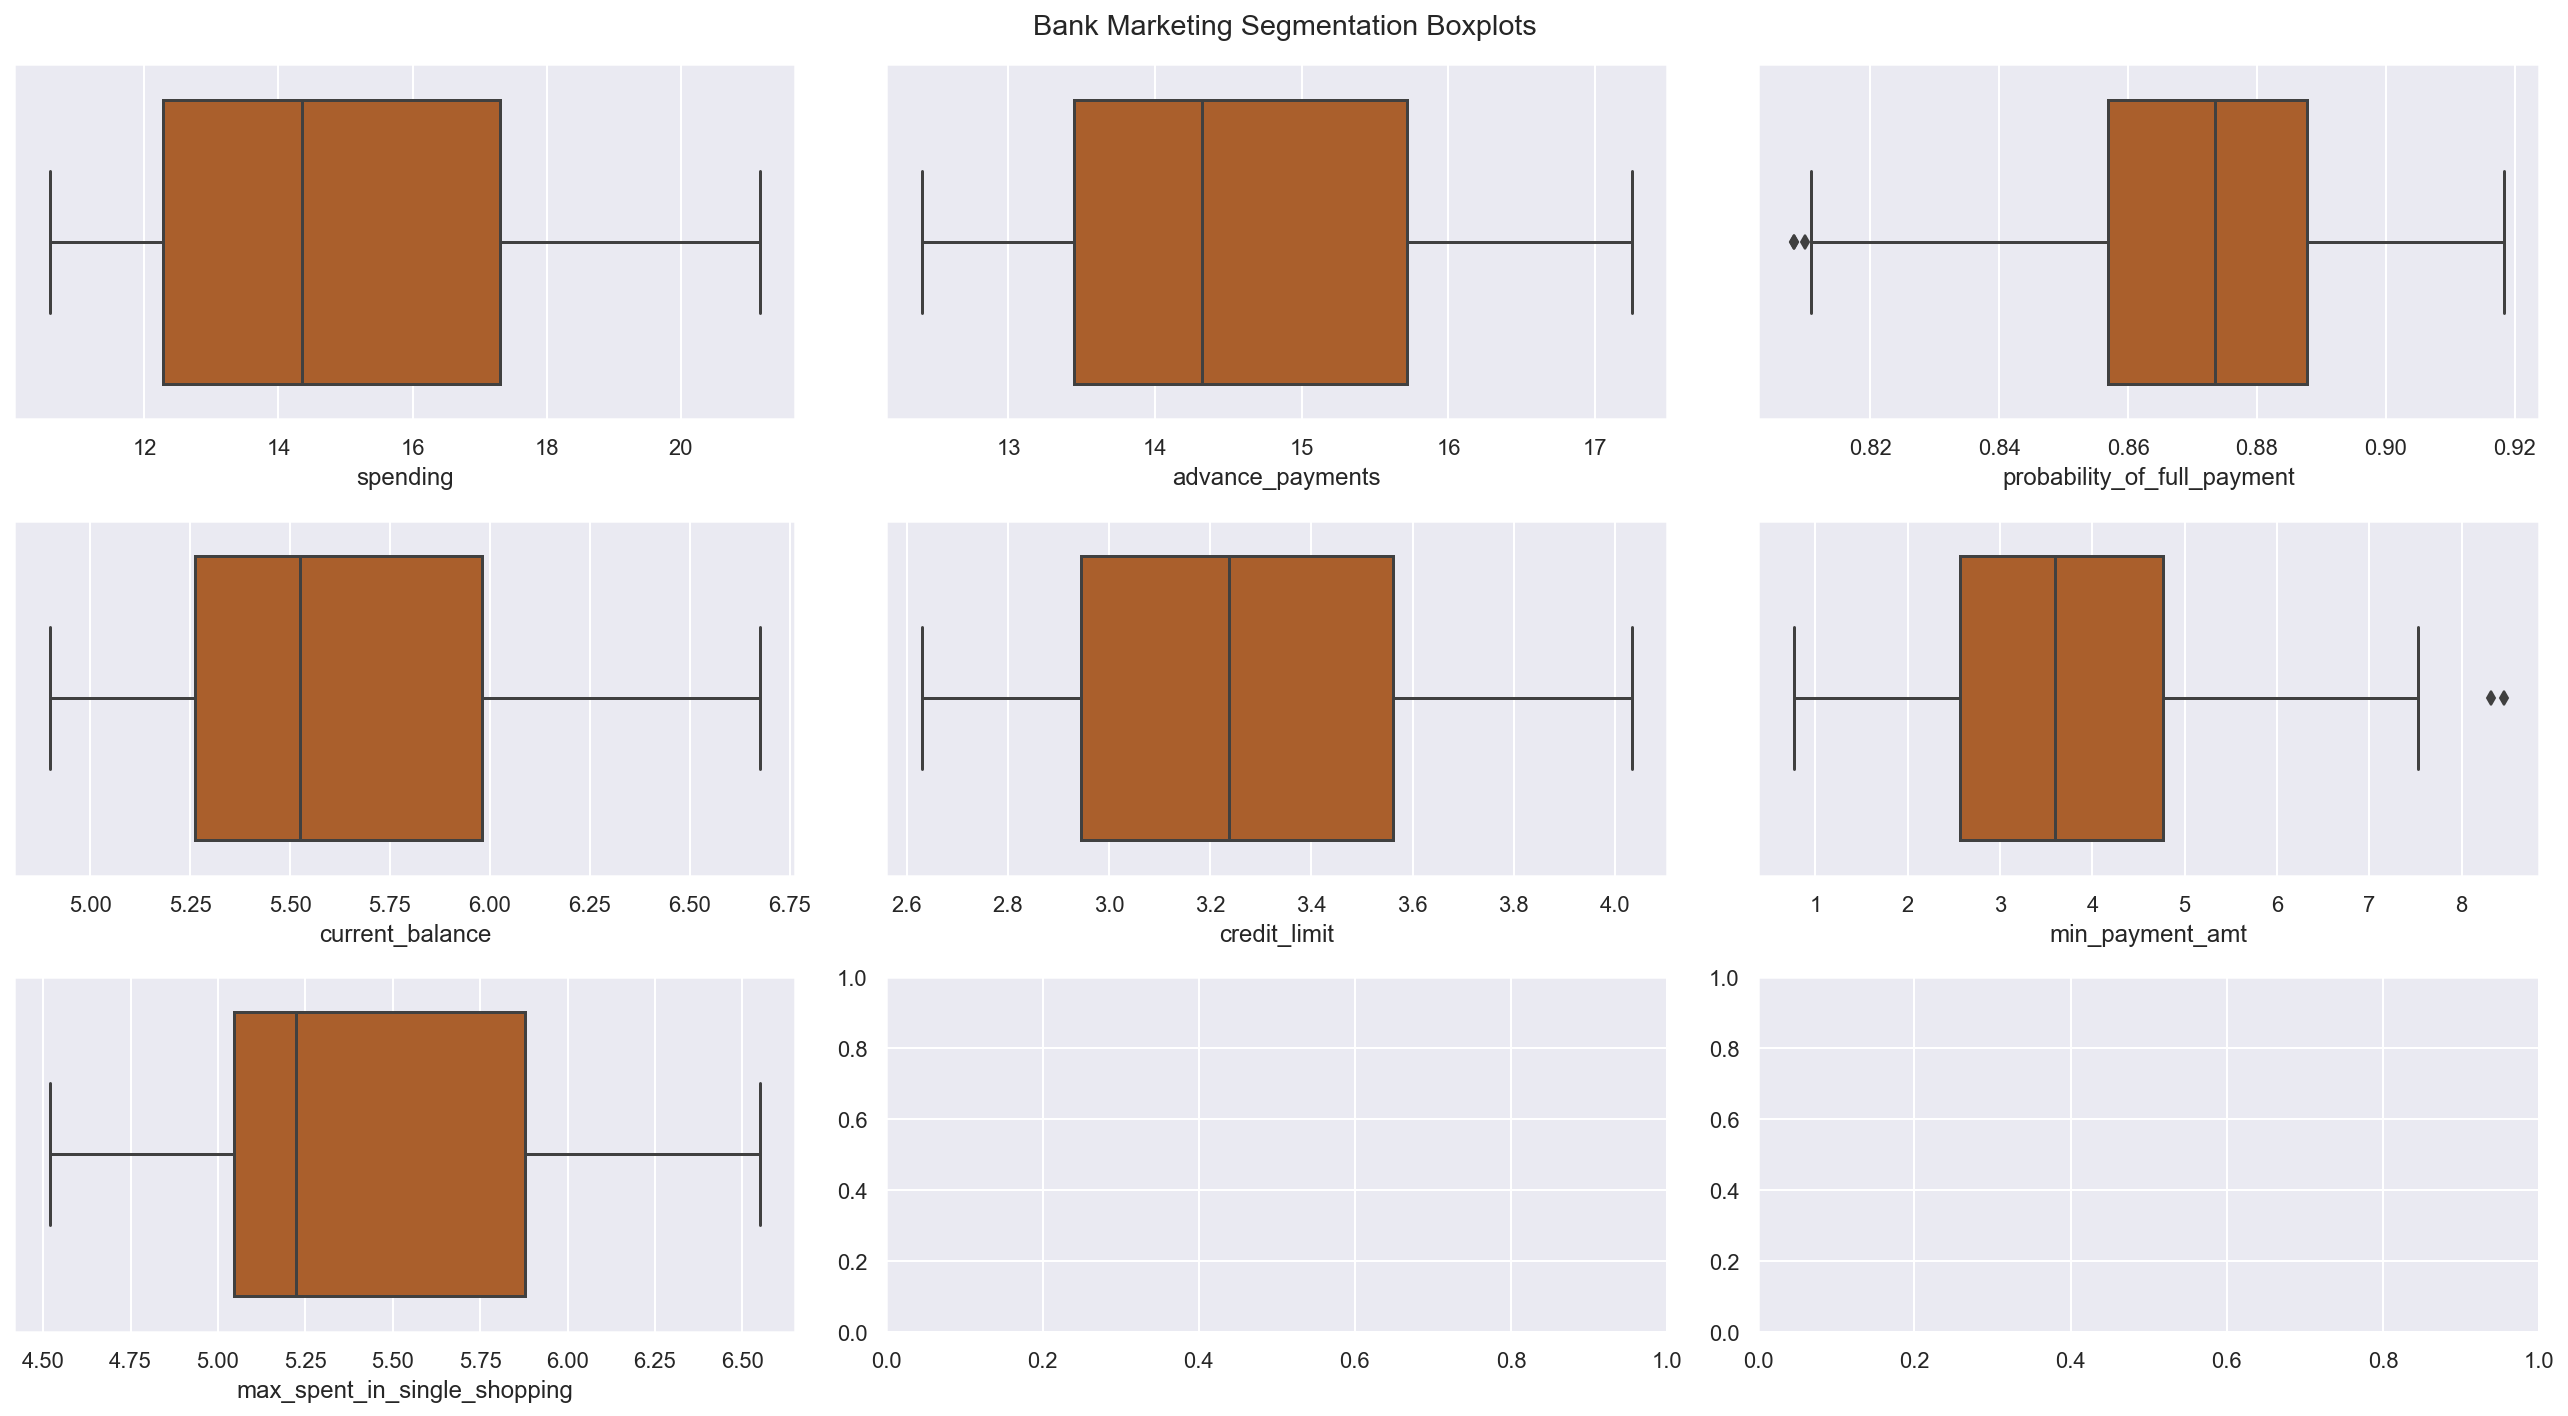

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(18, 10));

fig.suptitle('Bank Marketing Segmentation Boxplots');


sns.boxplot(data=bank, x='spending', ax=axes[0][0]);
sns.boxplot(data=bank, x='advance_payments', ax=axes[0][1]);
sns.boxplot(data=bank, x='probability_of_full_payment', ax=axes[0][2]);
sns.boxplot(data=bank, x='current_balance', ax=axes[1][0]);
sns.boxplot(data=bank, x='credit_limit', ax=axes[1][1]);
sns.boxplot(data=bank, x='min_payment_amt', ax=axes[1][2]);
sns.boxplot(data=bank, x='max_spent_in_single_shopping', ax=axes[2][0]);
plt.tight_layout();


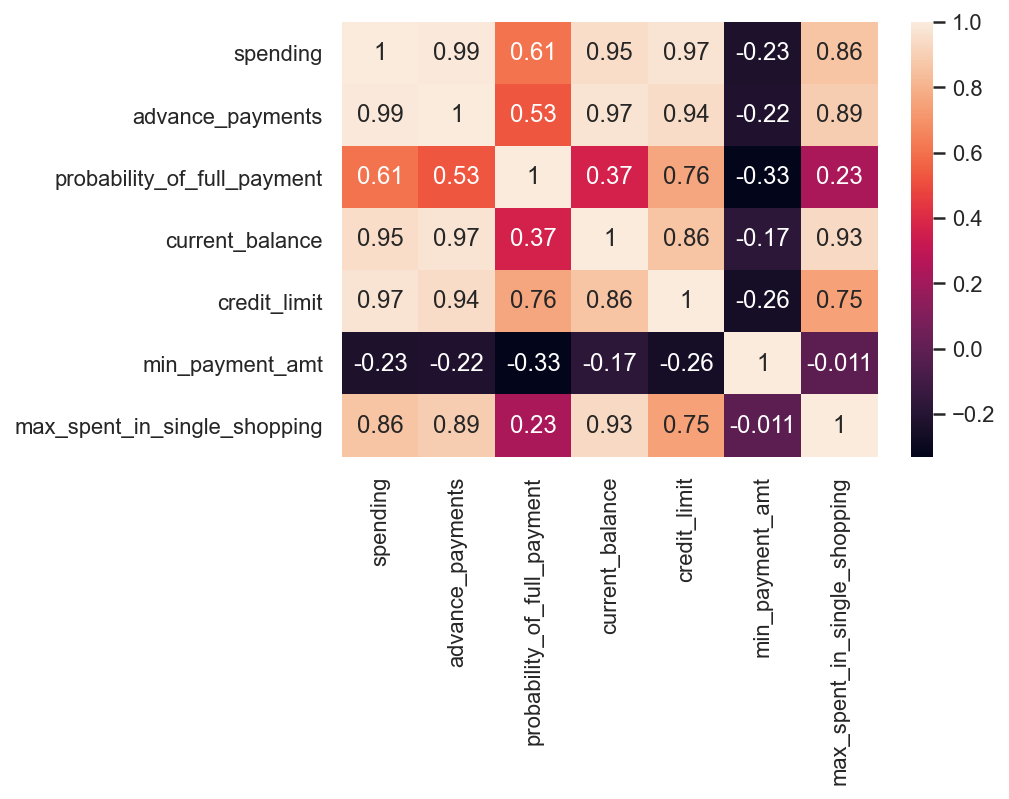

In [15]:
sns.heatmap(bank.corr(), annot=True, fmt='.2g');
plt.savefig('bank_corr_heatmap.jpg', bbox_inches='tight');

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Hierarchical Clustering

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#D68910"> Scale Data

* Clustering Algorithm clusters similar or homogeneous records together
* Similaroty or Homogeneity of records is determined by distance
* Hence, Clustering is a 'Distance' based Algorithm
* If the units of all variables is not same, then the larger values will dominate, which will not be 
correct and would lead to biased output
* Standardising or Scaling takes care of this issue
* Standardising converts all variables into standard scale with mean=0 and standard deviation=1.

    
* Here in this example, as variables have different units (multiples of 100s, 1000s, 10000s) - WE NEED TO SCALE
* We'll apply Standard Scaling

In [16]:
sc = StandardScaler()

In [17]:
scaled_bank = sc.fit_transform(bank)
scaled_bank = pd.DataFrame(scaled_bank, columns=bank.columns)
scaled_bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


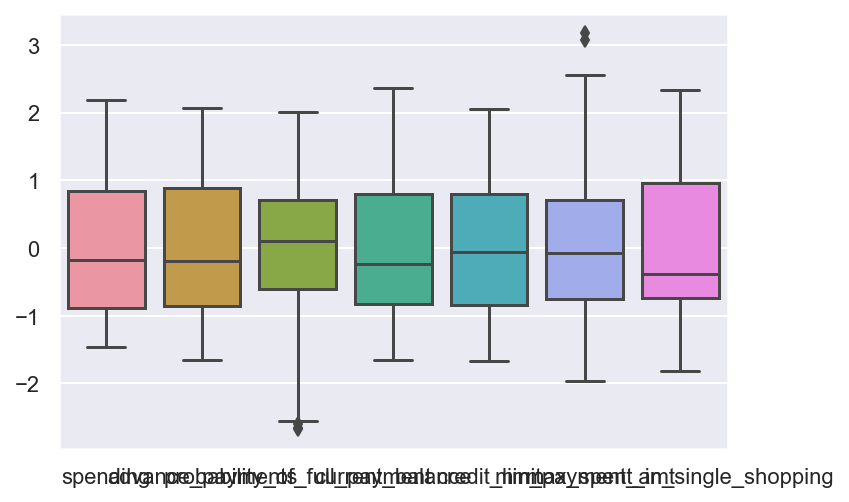

In [18]:
sns.boxplot(data=scaled_bank);
plt.savefig('bank_box_scaled_data.jpg', bbox_inches='tight');

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#D68910"> Creating Dendrograms with Euclidean distance and Different Linkage Methods

In [19]:
averagelink = linkage(scaled_bank, method = 'average')
wardlink = linkage(scaled_bank, method='ward')

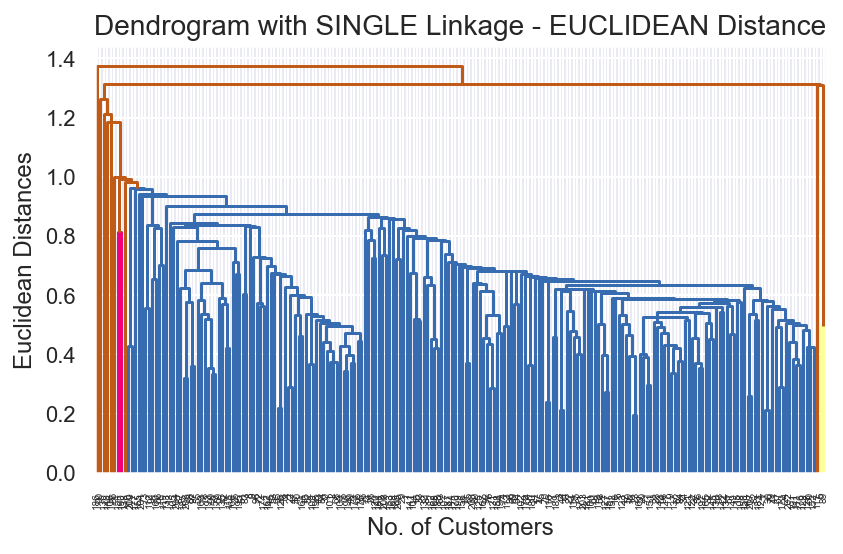

In [20]:
link = linkage(scaled_bank, method='single')
dend = dendrogram(link);
plt.title('Dendrogram with SINGLE Linkage - EUCLIDEAN Distance', fontsize=14);
plt.xlabel('No. of Customers', fontsize=12);
plt.ylabel('Euclidean Distances', fontsize=12);
plt.tight_layout();
plt.savefig('dend_single_eucl.jpg', bbox_inches='tight');

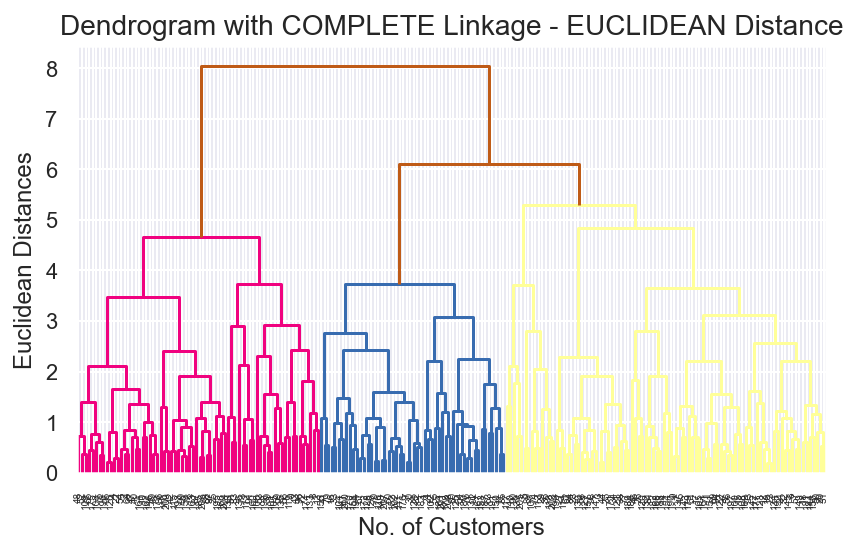

In [21]:
link = linkage(scaled_bank, method='complete')
dend = dendrogram(link);
plt.title('Dendrogram with COMPLETE Linkage - EUCLIDEAN Distance', fontsize=14);
plt.xlabel('No. of Customers', fontsize=12);
plt.ylabel('Euclidean Distances', fontsize=12);
plt.tight_layout();
plt.savefig('dend_complete_eucl.jpg', bbox_inches='tight');


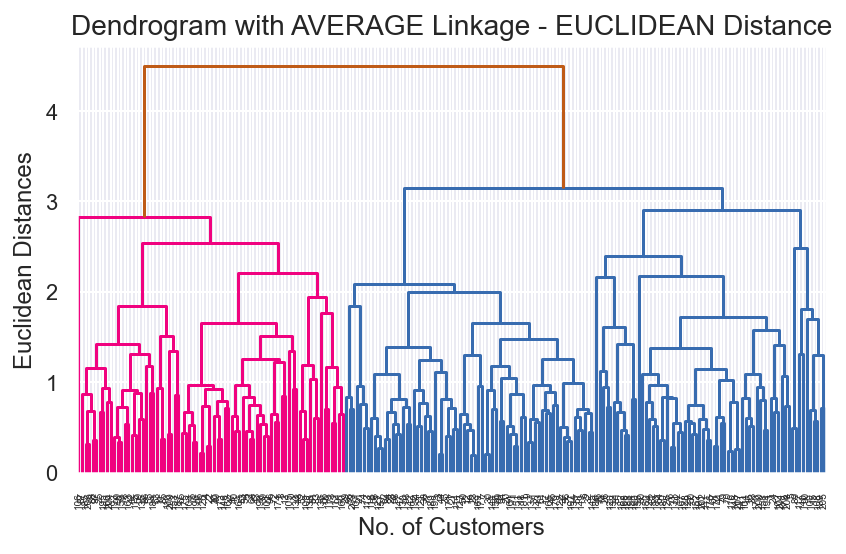

In [22]:
link = linkage(scaled_bank, method='average')
dend = dendrogram(link);
plt.title('Dendrogram with AVERAGE Linkage - EUCLIDEAN Distance', fontsize=14);
plt.xlabel('No. of Customers', fontsize=12);
plt.ylabel('Euclidean Distances', fontsize=12);
plt.tight_layout();
plt.savefig('dend_average_eucl.jpg', bbox_inches='tight');


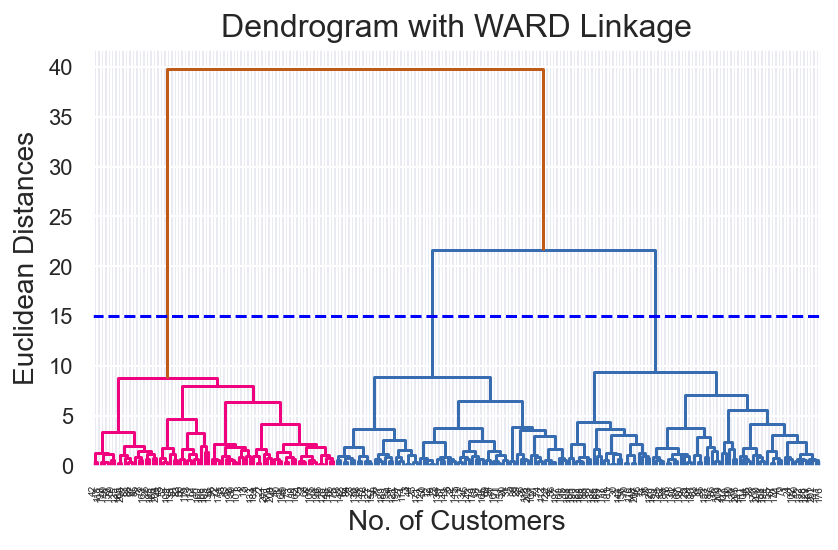

In [23]:

wardlink = linkage(scaled_bank, method='ward')
dend = dendrogram(wardlink, color_threshold=None);
plt.title('Dendrogram with WARD Linkage', fontsize=16);
plt.xlabel('No. of Customers', fontsize=14);
plt.ylabel('Euclidean Distances', fontsize=14);
plt.axhline(y=15, ls='--', lw=1.5, color='blue')
plt.tight_layout();

plt.savefig('dend_ward_eucl.jpg', bbox_inches='tight');

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#D68910"> Dendrogram with AVERAGE Linkage and MANHATTAN Distances

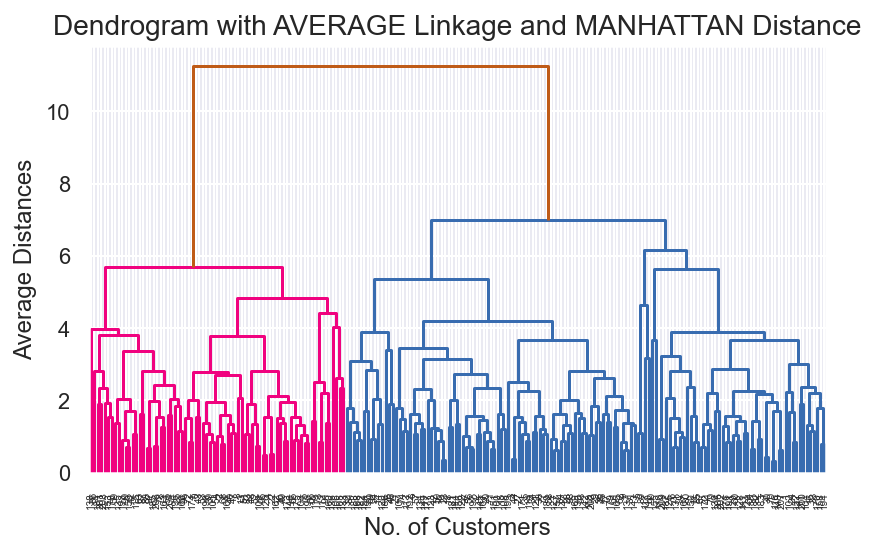

In [24]:
link = linkage(scaled_bank, method='average', metric='cityblock')
dend = dendrogram(link);
plt.title('Dendrogram with AVERAGE Linkage and MANHATTAN Distance', fontsize=14);
plt.xlabel('No. of Customers', fontsize=12);
plt.ylabel('Average Distances', fontsize=12);
plt.tight_layout();

plt.savefig('dend_average_manhattan.jpg', bbox_inches='tight');

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#D68910"> Truncate WARD Linkage Dendrogram 

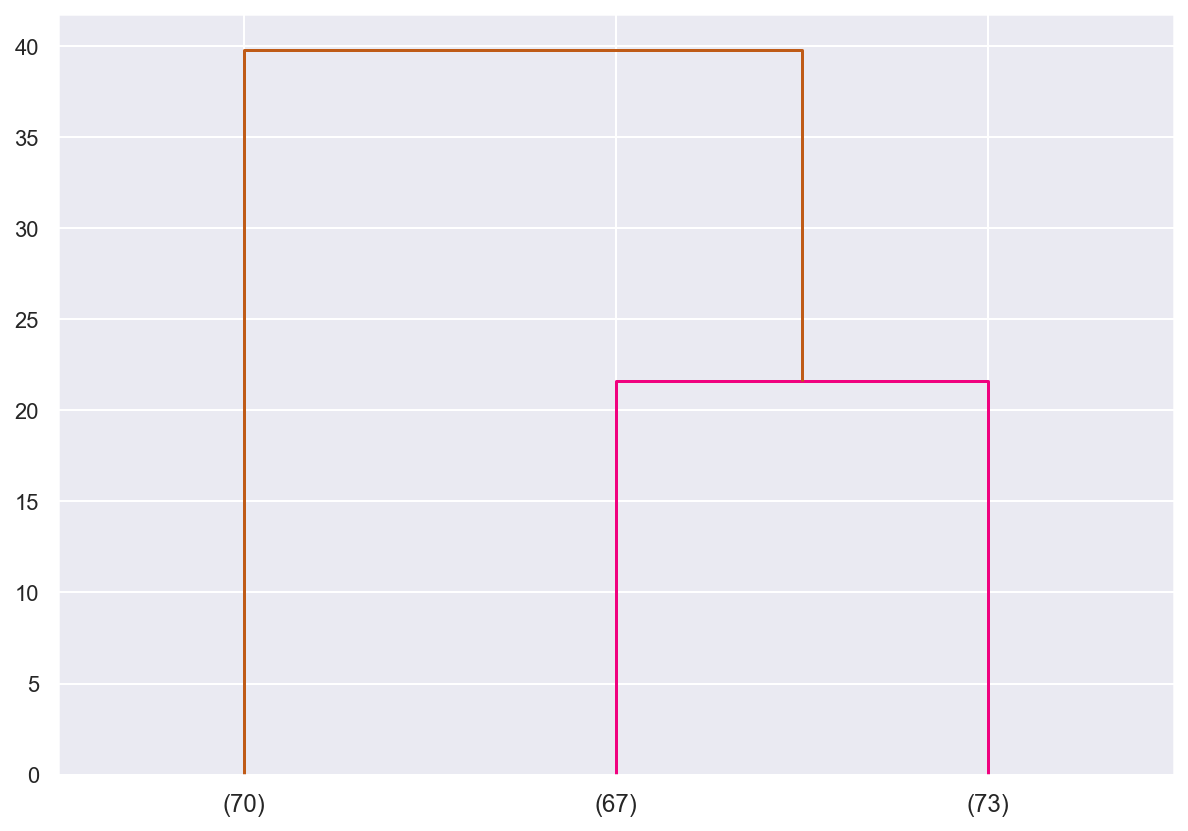

In [25]:
plt.figure(figsize=[10,7]);
dendWard = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 3
                 );

plt.savefig('truncated_dend_ward.jpg', bbox_inches='tight');

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#D68910"> Creating and Labelling Clusters

In [26]:
# Set criterion as maxclust,then create 3 clusters, and store the result in another object 'clusters'

clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [27]:
bank_h = bank.copy()
scaled_bank_h = scaled_bank.copy()
bank_h['Cluster'] = clusters
scaled_bank_h['Cluster'] = clusters

In [28]:
bank_h.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Cluster
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#D68910"> Cluster Profiles

In [29]:
bank_h['Cluster'].value_counts()

3    73
1    70
2    67
Name: Cluster, dtype: int64

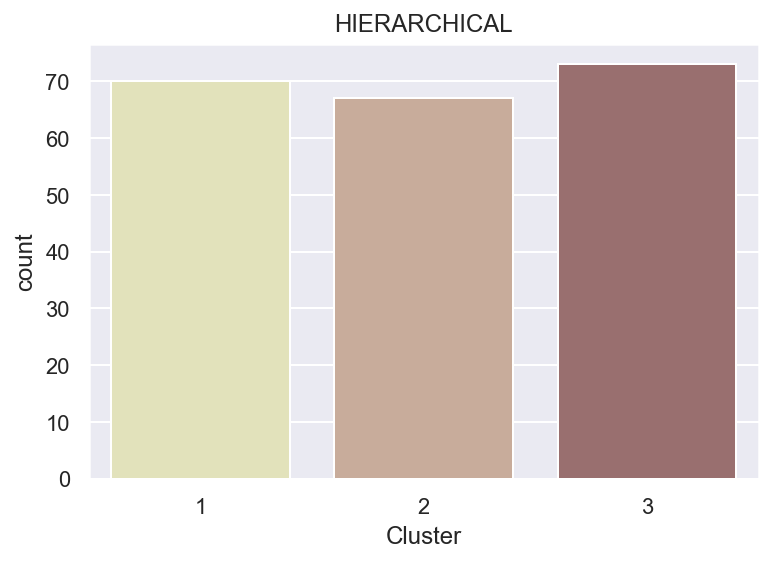

In [58]:
sns.countplot(x='Cluster', data=bank_h, palette='pink_r');

plt.title('HIERARCHICAL');
plt.savefig('hierarch_cluster_balance_chart1.jpg', bbox_inches='tight');

In [31]:
round(bank_h.groupby('Cluster').mean(), 2).to_csv('hierarchical_cluster_profile_mean.csv')
round(bank_h.groupby('Cluster').mean(), 2)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
Cluster,,,,,,,
1,18.37,16.15,0.88,6.16,3.68,3.64,6.02
2,11.87,13.26,0.85,5.24,2.85,4.95,5.12
3,14.20,14.23,0.88,5.48,3.23,2.61,5.09


In [32]:
bank_h.groupby('Cluster').median().to_csv('hierarchical_cluster_profile_median.csv')
bank_h.groupby('Cluster').median()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
Cluster,,,,,,,
1,18.72,16.21,0.88395,6.1485,3.6935,3.629,5.9815
2,11.83,13.27,0.84910,5.2360,2.8330,4.857,5.0910
3,14.33,14.28,0.87960,5.5040,3.2210,2.504,5.0970


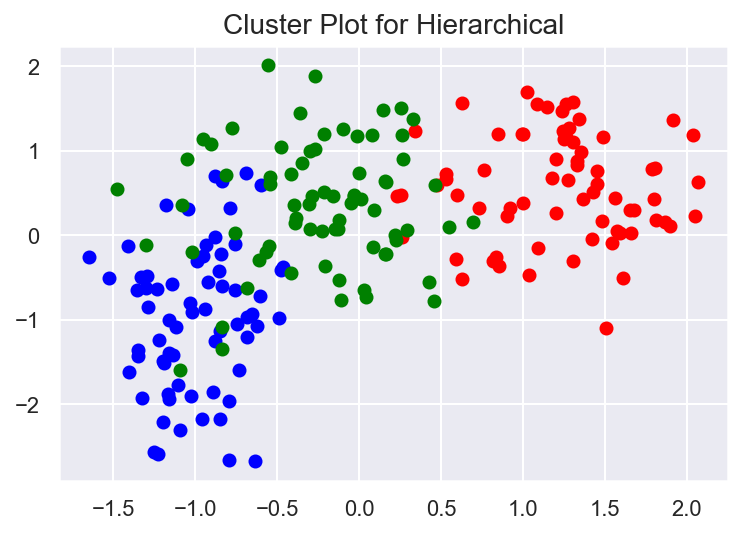

In [33]:

X = scaled_bank_h.copy()

plt.scatter(X[X['Cluster']==1].iloc[:,1], X[X['Cluster']==1].iloc[:,2] ,marker='o', color='red');
plt.scatter(X[X['Cluster']==2].iloc[:,1], X[X['Cluster']==2].iloc[:,2] ,marker='o', color='blue');
plt.scatter(X[X['Cluster']==3].iloc[:,1], X[X['Cluster']==3].iloc[:,2] ,marker='o', color='green');
plt.title('Cluster Plot for Hierarchical', fontsize=14);

plt.savefig('hierarch_cluster_plot.jpg', bbox_inches='tight');

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> K Means Clustering

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#D68910"> Choosing Optimum no. of Clusters by WSS Elbow Curve

In [34]:
wss=[]
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(scaled_bank)
    wss.append(km.inertia_)



KMeans(n_clusters=1)

KMeans(n_clusters=2)

KMeans(n_clusters=3)

KMeans(n_clusters=4)

KMeans(n_clusters=5)

KMeans(n_clusters=6)

KMeans(n_clusters=7)

KMeans()

KMeans(n_clusters=9)

KMeans(n_clusters=10)

In [35]:
wss

[1469.9999999999998,
 659.171754487041,
 430.6589731513006,
 371.2834476674333,
 326.311446829373,
 289.92195256024206,
 267.519515977114,
 238.92528814621474,
 221.586669850058,
 206.13687672886795]

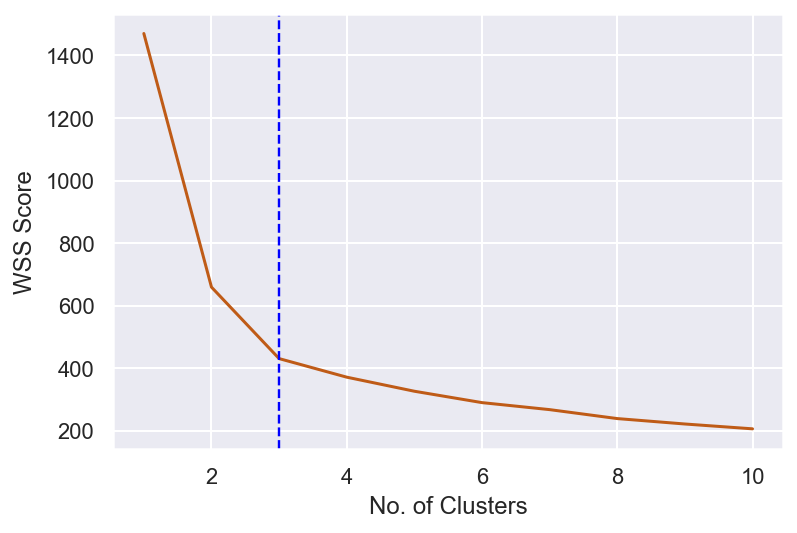

In [36]:
plt.plot(range(1,11), wss);
plt.xlabel('No. of Clusters');
plt.ylabel('WSS Score');
plt.axvline(x=3, color='blue', ls='--', lw=1.2);

plt.savefig('kmeans_wss_plot.jpg', bbox_inches='tight');

* There is an Elbow at x=3
* i.e. After x=3, there is no significant difference in the curve and its almost flat
* So, we conclude and take Optimum No. of Clusters = 3


### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#D68910"> Evaluate Clusters by Silhouette Score

In [37]:
for i in range(2,11):
    k_means=KMeans(n_clusters=i)
    k_means.fit(scaled_bank)
    k_labels = k_means.labels_
    silhouette_score(scaled_bank,k_labels)

KMeans(n_clusters=2)

0.46577247686580914

KMeans(n_clusters=3)

0.4007270552751299

KMeans(n_clusters=4)

0.3347542296283262

KMeans(n_clusters=5)

0.2876781560686676

KMeans(n_clusters=6)

0.2865738776363438

KMeans(n_clusters=7)

0.2742790992455469

KMeans()

0.27758422935947824

KMeans(n_clusters=9)

0.2570425087640475

KMeans(n_clusters=10)

0.25895404769116964

* Silhoutte Score of Clusters explains separatability of clusters
* Values range from (-1, 1) ---> where higher value indicates a better separation between clusters


* We see here that Sil Score for 2 Clusters is highest and close second is 3 clusters
* 2 clusters being too less for profiling, WE CHOOSE 3 CLUSTERS

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> KMeans Clustering with 3 Clusters

In [38]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(scaled_bank)
labels = kmeans.labels_

KMeans(n_clusters=3)

In [39]:
bank_k = bank.copy()
scaled_bank_k = scaled_bank.copy()

In [40]:
bank_k['Cluster'] = labels
scaled_bank_k['Cluster'] = labels

In [41]:
bank_k.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Cluster
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,0
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,0
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,0



### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#D68910"> Silhouette Score for 3 Clusters

In [42]:
# SILHOUETTE SCOER FOR 3 CLUSTERS

silhouette_score(scaled_bank,labels)

0.4007270552751299


### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#D68910"> Silhouette Widths for Each Observation

In [43]:
# SILHOUETTE WIDTH OF EVERY OBSERVATION IN EACH CLUSTER

sil_width = silhouette_samples(scaled_bank,labels)

In [44]:
bank_k["sil_width"] = sil_width
bank_k.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Cluster,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,0,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,0,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,1,0.512458
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,0,0.362276



### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#D68910"> Minimum Silhouette Width of All Clusters

In [45]:
silhouette_samples(scaled_bank,labels).min()

0.002713089347678533

In [46]:
bank_k['sil_width'].sort_values()

190    0.002713
87     0.005457
144    0.007584
156    0.014734
117    0.023507
         ...   
54     0.619671
39     0.622415
68     0.632052
2      0.637784
101    0.639285
Name: sil_width, Length: 210, dtype: float64

* Minimum Silhouette width is also positive
* This indicates that no clusters are overlapping and they are all reasonably well separated

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#D68910"> Cluster Profile

In [47]:
bank_k['Cluster'].value_counts()

1    72
2    71
0    67
Name: Cluster, dtype: int64

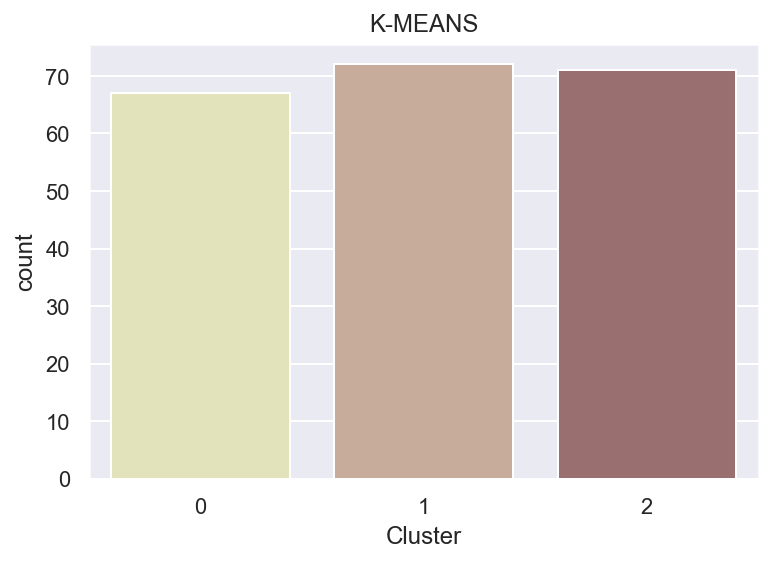

In [59]:
sns.countplot(x='Cluster', data=bank_k, palette='pink_r');

plt.title('K-MEANS');
plt.savefig('kmeans_cluster_size.jpg', bbox_inches='tight');

In [49]:
round(bank_k.groupby('Cluster').mean(), 2).to_csv('bank_kmeans_cluster_profile.csv')
round(bank_k.groupby('Cluster').mean(), 2)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,sil_width
Cluster,,,,,,,,
0,18.50,16.20,0.88,6.18,3.70,3.63,6.04,0.47
1,11.86,13.25,0.85,5.23,2.85,4.74,5.10,0.40
2,14.44,14.34,0.88,5.51,3.26,2.71,5.12,0.34


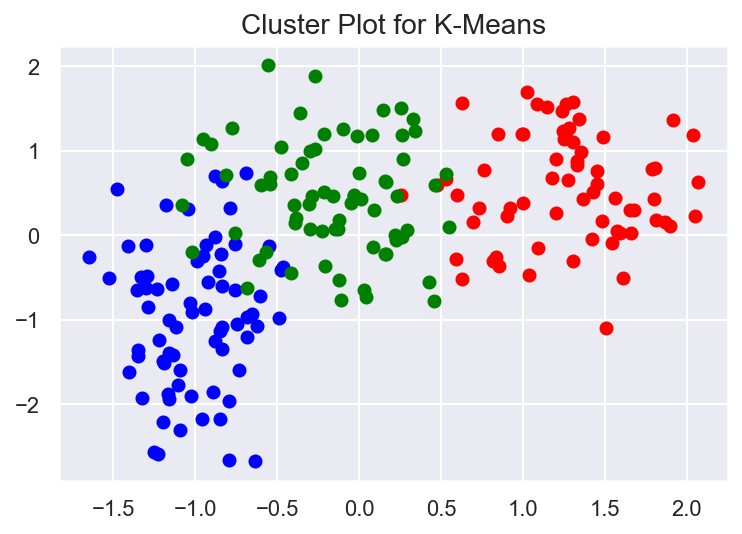

In [50]:

X = scaled_bank_k.copy()

plt.scatter(X[X['Cluster']==0].iloc[:,1], X[X['Cluster']==0].iloc[:,2] ,marker='o', color='red');
plt.scatter(X[X['Cluster']==1].iloc[:,1], X[X['Cluster']==1].iloc[:,2] ,marker='o', color='blue');
plt.scatter(X[X['Cluster']==2].iloc[:,1], X[X['Cluster']==2].iloc[:,2] ,marker='o', color='green');
plt.title('Cluster Plot for K-Means', fontsize=14);

plt.savefig('cluster_plot_kmeans.jpg', bbox_inches='tight');

===================================================================================================================

===================================================================================================================

===================================================================================================================

### <span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#D68910"> Problem 2 - Tour Insurance CART, RF, ANN

#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#424949"> An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. 
    
#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#424949"> Use CART, RF & ANN and compare the models performances in train and test sets.

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Import Libraries

In [86]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier                  # CART
from sklearn import tree                                         # TREE VISUALISATION
from sklearn.ensemble import RandomForestClassifier              # RANDOM FOREST
from sklearn.neural_network import MLPClassifier                 # ML Neural Network
from sklearn.model_selection import train_test_split             # Train Test Split
from sklearn.model_selection import GridSearchCV                 # Grid Search - to select the best paramaters
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,roc_auc_score,roc_curve 

from sklearn.preprocessing import StandardScaler                 # ZScore

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(color_codes=True)
sns.set_palette('Accent_r')

%config InlineBackend.figure_format ='retina'

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Load and Explore Dataset

In [151]:
ins = pd.read_csv('insurance_modelling.csv')
ins.head(10).to_csv('insurance_modelling_head.csv')
ins.head(10)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA
5,45,JZI,Airlines,Yes,15.75,Online,8,45.00,Bronze Plan,ASIA
6,61,CWT,Travel Agency,No,35.64,Online,30,59.40,Customised Plan,Americas
7,36,EPX,Travel Agency,No,0.00,Online,16,80.00,Cancellation Plan,ASIA
8,36,EPX,Travel Agency,No,0.00,Online,19,14.00,Cancellation Plan,ASIA
9,36,EPX,Travel Agency,No,0.00,Online,42,43.00,Cancellation Plan,ASIA


### **Attribute Information**

1. **Target**: Claim Status (`Claimed`)
2. Code of tour firm (`Agency_Code`)
3. Type of tour insurance firms (`Type`)
4. Distribution channel of tour insurance agencies (`Channel`)
5. Name of the tour insurance products (`Product`)
6. Duration of the tour (`Duration`)
7. Destination of the tour (`Destination`)
8. Amount of sales of tour insurance policies (`Sales`)
9. The commission received for tour insurance firm (`Commission`)
10. Age of insured (`Age`)


In [152]:
ins.shape

(3000, 10)

In [153]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [154]:
ins.describe(include='all')

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000,3000,3000,3000.000000,3000,3000.000000,3000.000000,3000,3000
unique,NaN,4,2,2,NaN,2,NaN,NaN,5,3
top,NaN,EPX,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1365,1837,2076,NaN,2954,NaN,NaN,1136,2465
mean,38.091000,NaN,NaN,NaN,14.529203,NaN,70.001333,60.249913,NaN,NaN
std,10.463518,NaN,NaN,NaN,25.481455,NaN,134.053313,70.733954,NaN,NaN
min,8.000000,NaN,NaN,NaN,0.000000,NaN,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,0.000000,NaN,11.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,NaN,4.630000,NaN,26.500000,33.000000,NaN,NaN
75%,42.000000,NaN,NaN,NaN,17.235000,NaN,63.000000,69.000000,NaN,NaN


### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Creating a Separate List for Continuous Variables

In [155]:
# Selecting Columns with Continuous Datatypes and creating a separate list for it

col1 = ins.columns
cont=[]
for i in range(0, len(col1)):
    if ((ins[col1[i]].dtypes=='int64') | (ins[col1[i]].dtypes=='float64')):
        cont.append(col1[i])
cont

['Age', 'Commision', 'Duration', 'Sales']

In [156]:
for i in range(0, len(cont)):
    print('{}  -------->       Mean = {},    Median = {},    CV = {}'.format(cont[i], round(ins[cont[i]].mean(), 2), round(ins[cont[i]].median(), 2), round(ins[cont[i]].std()*100/ins[cont[i]].mean(), 2)))

Age  -------->       Mean = 38.09,    Median = 36.0,    CV = 27.47
Commision  -------->       Mean = 14.53,    Median = 4.63,    CV = 175.38
Duration  -------->       Mean = 70.0,    Median = 26.5,    CV = 191.5
Sales  -------->       Mean = 60.25,    Median = 33.0,    CV = 117.4


### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Creating a Separate List for Categorical Variables (Removing Target Var)

In [157]:
# Selecting Columns with Object Datatypes and creating a separate list for it

col1 = ins.columns
obj=[]
for i in range(0, len(col1)):
    if ((ins[col1[i]].dtypes=='object')):
        obj.append(col1[i])
obj.remove('Claimed')
obj

['Agency_Code', 'Type', 'Channel', 'Product Name', 'Destination']

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Getting Unique Count for all Categorical Variables

In [158]:
# LISTING ALL CATEGORICAL VARIABLES WITH ALL ITS LEVELS
# WITH COUNTS OF EACH LEVEL

for i in range(0, len(obj)):
    print(obj[i].upper(), ': ', ins[obj[i]].nunique())
    print(ins[obj[i]].value_counts().sort_values())
    print('\n')

AGENCY_CODE :  4
JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64


TYPE :  2
Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64


CHANNEL :  2
Offline      46
Online     2954
Name: Channel, dtype: int64


PRODUCT NAME :  5
Gold Plan             109
Silver Plan           427
Bronze Plan           650
Cancellation Plan     678
Customised Plan      1136
Name: Product Name, dtype: int64


DESTINATION :  3
EUROPE       215
Americas     320
ASIA        2465
Name: Destination, dtype: int64




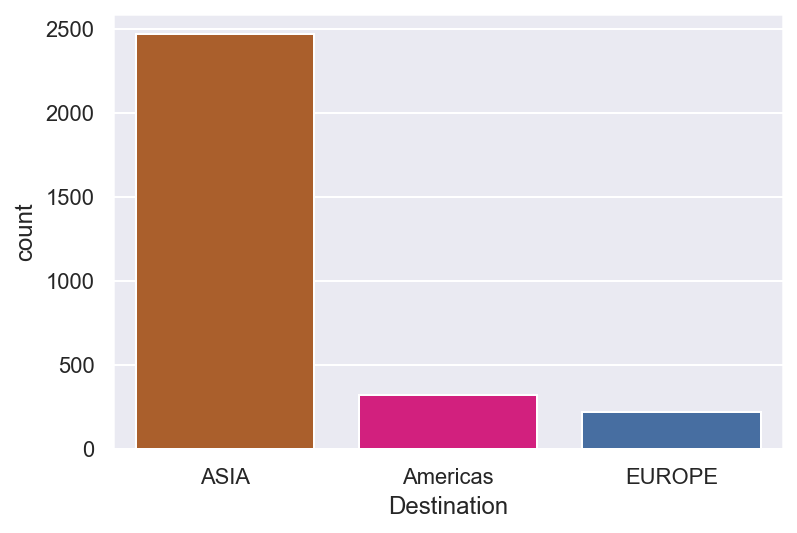

In [159]:
# fig, axes = plt.subplots(3, 2, figsize=(18, 15));


# sns.countplot(x=ins['Agency_Code'], ax=axes[0][0]);
# sns.countplot(x=ins['Type'], ax=axes[0][1]);
# sns.countplot(x=ins['Channel'], ax=axes[1][0]);
# sns.countplot(x=ins['Product Name'], ax=axes[1][1]);
# sns.countplot(x=ins['Agency_Code'], ax=axes[0][0]);


# a = sns.countplot(x=ins['Product Name']);
# a.set_xticklabels(obj,rotation = 20, fontsize=12);
# plt.savefig('ins_count3.jpg', bbox_inches='tight');

sns.countplot(x=ins['Destination']);
plt.savefig('ins_count4.jpg', bbox_inches='tight');

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Check for Missing Values

In [160]:
ins.isna().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [161]:
print('No. of Missing values =', ins.isna().sum().sum())

No. of Missing values = 0


### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea">Check for Duplicates

In [162]:
ins[ins.duplicated()]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [163]:
print('No. of Duplicate Rows =', ins.duplicated().sum())

No. of Duplicate Rows = 139


* Customer ID is not present in the dataset
* So, having a similar profile of tourists is very common
* Also in this dataset, no. of Duplicates are just 4-5% of the data
* So, either ways it wouldnt make much of a difference


* Here, lets decide to REMOVE them

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Drop Duplicates

In [164]:
ins.drop_duplicates(inplace=True)
print('No. of Duplicate Rows =', ins.duplicated().sum())

No. of Duplicate Rows = 0


In [165]:
ins.shape

(2861, 10)

In [166]:
ins.describe(include='all').T.to_csv('insurance_final_desribe.csv')
ins.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,2861,NaN,NaN,NaN,38.2041,10.6781,8,31,36,43,84
Agency_Code,2861,4,EPX,1238,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,2861,2,Travel Agency,1709,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,2861,2,No,1947,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,2861,NaN,NaN,NaN,15.081,25.8268,0,0,5.63,17.82,210.21
Channel,2861,2,Online,2815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,2861,NaN,NaN,NaN,72.1202,135.977,-1,12,28,66,4580
Sales,2861,NaN,NaN,NaN,61.7579,71.3997,0,20,33.5,69.3,539
Product Name,2861,5,Customised Plan,1071,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,2861,3,ASIA,2327,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Variable 'Duration' check

In [167]:
ins[ins['Duration'] <= 0]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
1508,25,JZI,Airlines,No,6.30,Online,-1,18.00,Bronze Plan,ASIA
1746,48,C2B,Airlines,No,0.14,Online,0,0.51,Customised Plan,ASIA
2628,37,C2B,Airlines,No,49.60,Online,0,124.00,Bronze Plan,ASIA


### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Check for Outliers

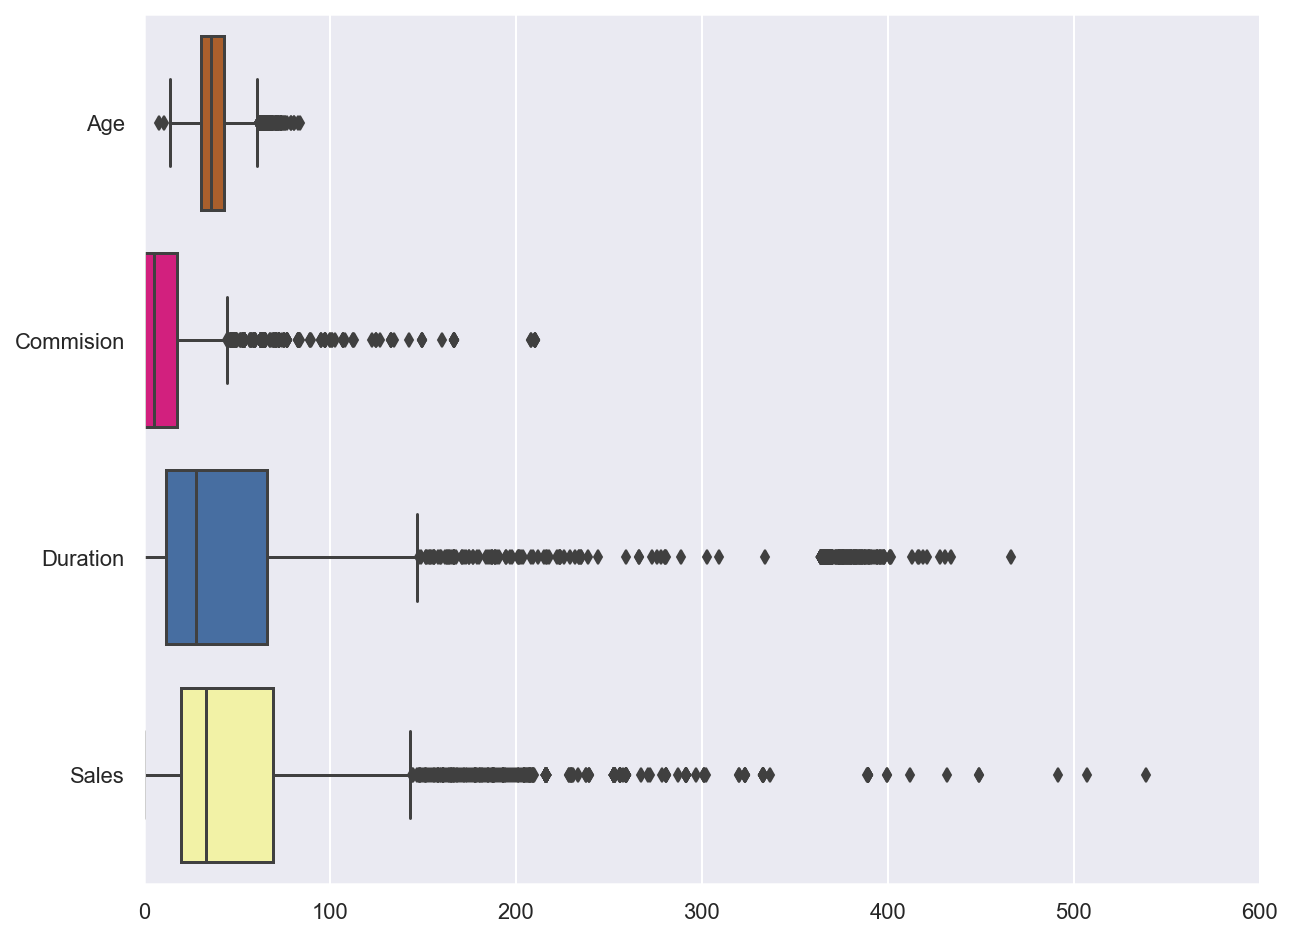

In [168]:
plt.figure(figsize=[10,8])
plt.xlim(0,600)
sns.boxplot(data=ins, orient='h');
plt.savefig('ins_boxplot.jpg', bbox_inches='tight');

* There are many outliers in the data
* As, CART and RF is not sensitive to Outliers
* WE'll NOT treat Outliers for now
* We'll revisit this step and compare model performances later

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Pairplot Distribution

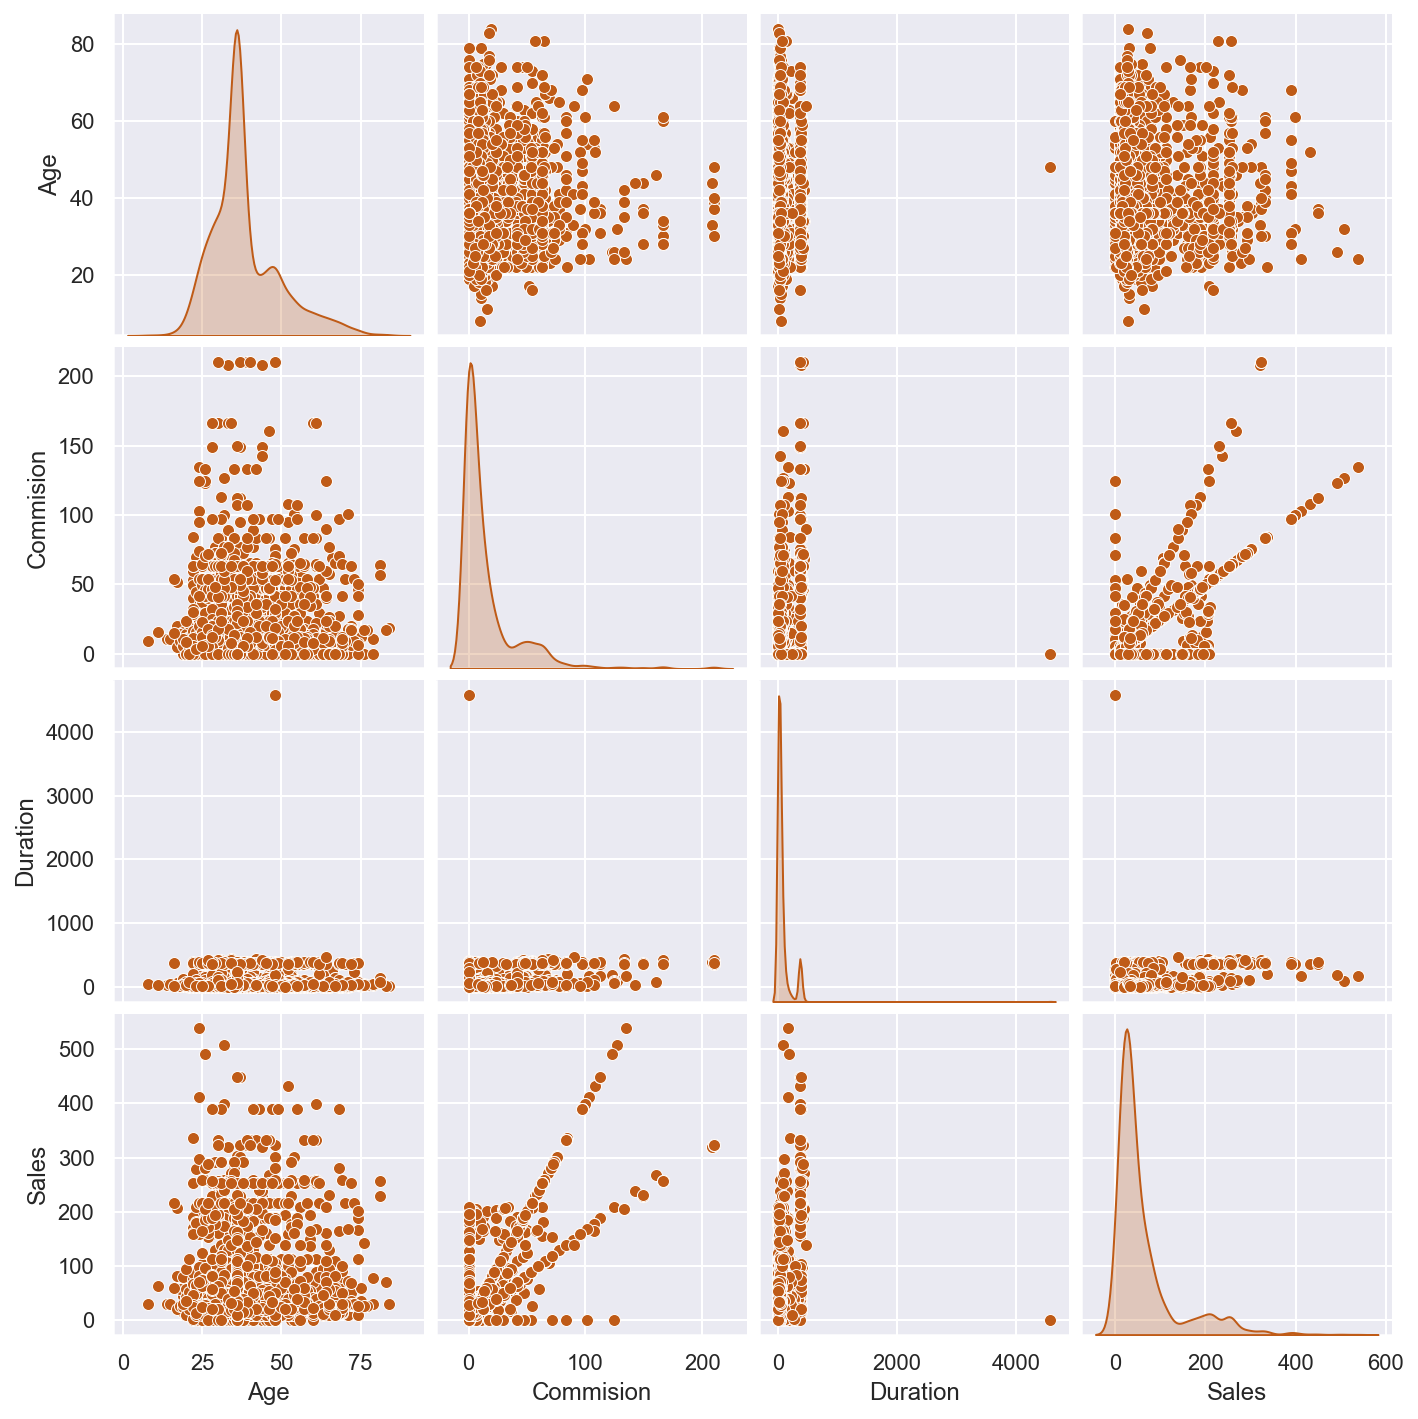

In [169]:
sns.pairplot(data=ins, diag_kind='kde');

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Check for Correlation

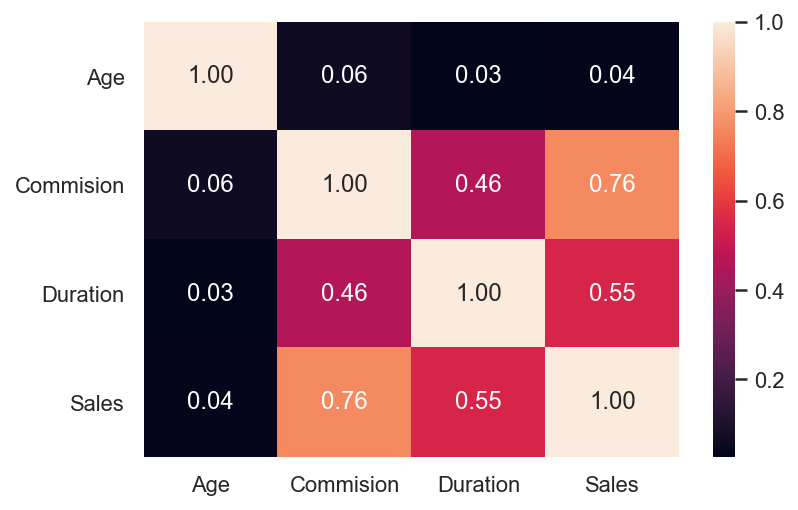

In [170]:
sns.heatmap(ins.corr(), annot=True, fmt='.2f');
plt.savefig('ins_correlation.jpg', bbox_inches='tight');

* Sales and Commission have significant correlation
* It can cause some issue of Multi-Collinearity
* But correlation is not high enough to take a definitive decision on it

* So, We'll keep both Variables for now

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Convert all Variables to Codes (Data Encoding)

In [171]:
coded_ins = ins.copy()
for feature in coded_ins.columns: 
    if coded_ins[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(coded_ins[feature].unique()))
        print(pd.Categorical(coded_ins[feature].unique()).codes)
        coded_ins[feature] = pd.Categorical(coded_ins[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [172]:
coded_ins.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [173]:
coded_ins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 128.5 KB



### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Check for Balance of 0s and 1s in Target Variable

In [110]:
coded_ins['Claimed'].value_counts()

0    1947
1     914
Name: Claimed, dtype: int64

In [111]:
(coded_ins['Claimed'].value_counts(normalize=True))*100

0    68.053128
1    31.946872
Name: Claimed, dtype: float64

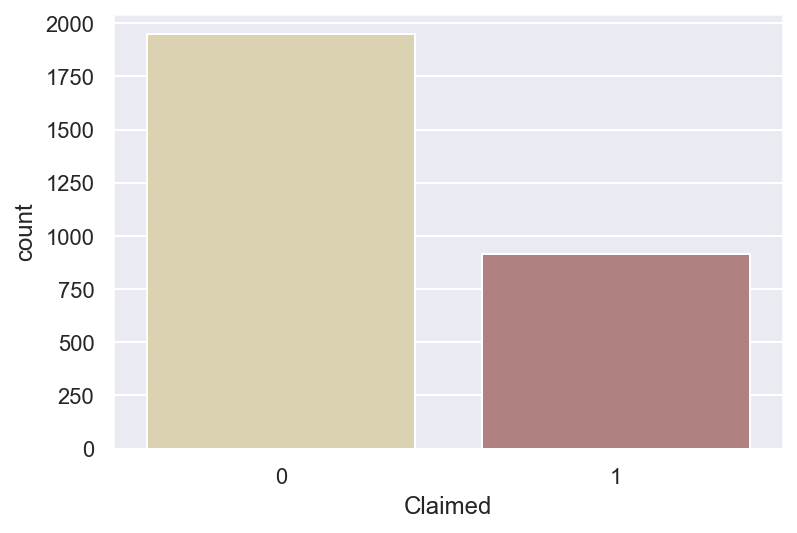

In [112]:
sns.countplot(coded_ins['Claimed'], palette='pink_r');
plt.savefig('bank_balance.jpg', bbox_inches='tight');

* There is a reasonable proportion of 0s and 1s in the data
* No issue with Class Imbalance


### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Assigning Dependent and Independent Variables

In [174]:
x = coded_ins.drop('Claimed', axis=1)
y = coded_ins['Claimed']

In [175]:
x.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


In [176]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Claimed, dtype: int8


### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Train and Test Split

In [177]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [178]:
print('Dimension of X Train Data :', x_train.shape)
print('Dimension of X Test Data :', x_test.shape)
print('')
print('Dimension of Y Train Data :', y_train.shape)
print('Dimension of Y Test Data :', y_test.shape)

Dimension of X Train Data : (2002, 9)
Dimension of X Test Data : (859, 9)

Dimension of Y Train Data : (2002,)
Dimension of Y Test Data : (859,)


### <span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#D35404"> Build CART - Decision Tree Classifier Model

In [118]:
dtree = DecisionTreeClassifier(random_state=0)

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Hyper Parameter Tuning - Using GridSearchCV

* Doing a GridSearch to choose the optimum values of the parameters
* Over 10 Cross-Folds

In [119]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 10, 15],
    'min_samples_leaf': [10, 15, 20, 30],
    'min_samples_split': [200, 300, 400],
}

In [120]:
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, verbose=True, cv=10)

In [121]:
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    9.4s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 10, 15],
                         'min_samples_leaf': [10, 15, 20, 30],
                         'min_samples_split': [200, 300, 400]},
             verbose=True)

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Fitting the Classifier with Best Parameters

In [122]:
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 20, 'min_samples_split': 200}


DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, min_samples_split=200,
                       random_state=0)

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Visualising Final Decision Tree

In [35]:
# tree_regularized.dot file is created in the working directory
# Open theis file and copy codes
# Visit www.webgraphviz.com and paste code here
# To get the Tree

train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= tree_regularized , feature_names = list(x_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data

In [36]:
from six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
import graphviz

True

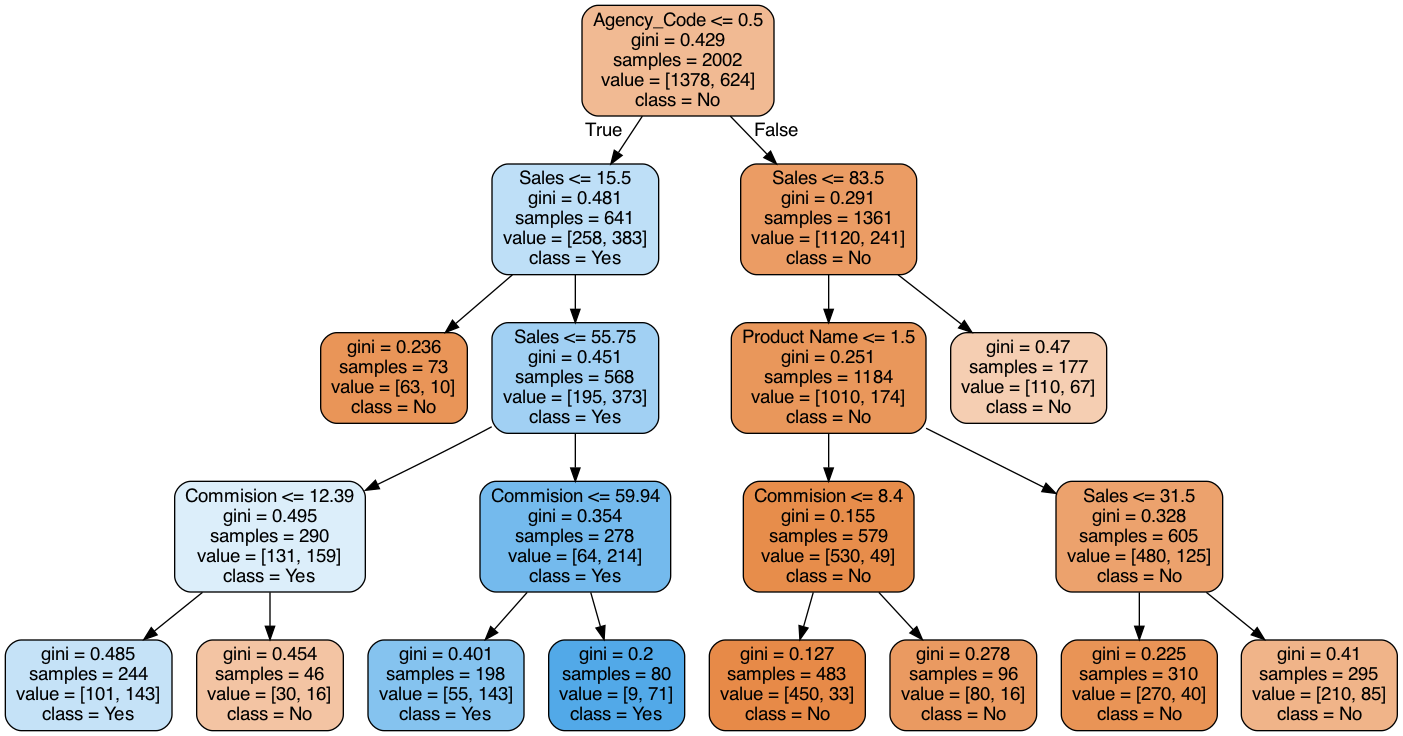

In [37]:
dot_data = StringIO()
export_graphviz(best_grid, out_file=dot_data, filled=True, rounded=True, feature_names=x_train.columns, class_names=['No', 'Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Decision_Tree.png')
Image(graph.create_png())

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Feature Importance

In [123]:
features = pd.DataFrame((best_grid.feature_importances_)*100, columns = ['Importance in %'], index=x_train.columns)

In [124]:
features

,Importance in %
Age,0.000000
Agency_Code,62.891004
Type,0.000000
Commision,3.696852
Channel,0.000000
Duration,0.000000
Sales,29.817691
Product Name,3.594453
Destination,0.000000


In [37]:
features = features.sort_values('Importance in %', ascending=False)
features

,Importance in %
Agency_Code,62.891004
Sales,29.817691
Commision,3.696852
Product Name,3.594453
Age,0.000000
Type,0.000000
Channel,0.000000
Duration,0.000000
Destination,0.000000


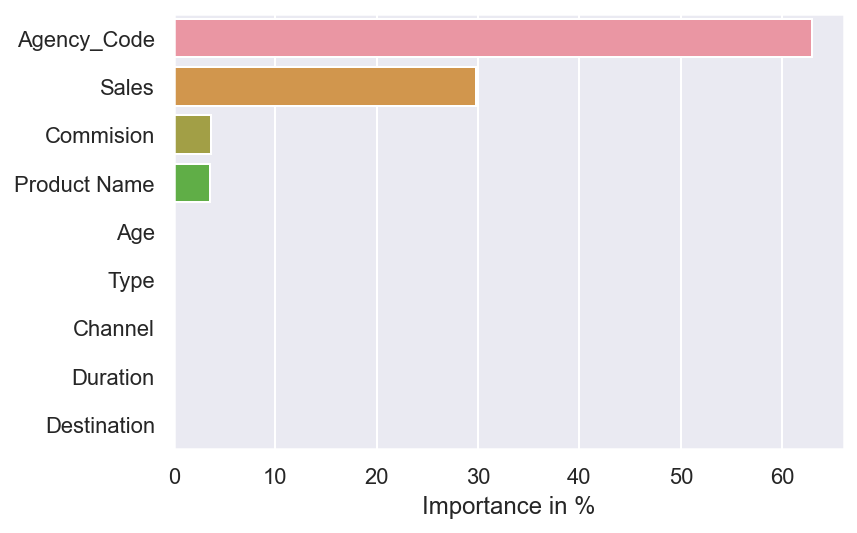

In [38]:
sns.barplot(y=features.index, x=features['Importance in %']);
plt.savefig('cart_feature_importance.jpg', bbox_inches='tight');

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Predicting on Training and Test Data

In [39]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Predicted Classes and their Probabilities

In [40]:
ytest_predict_prob=best_grid.predict_proba(x_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.277778,0.722222
1,0.870968,0.129032
2,0.277778,0.722222
3,0.711864,0.288136
4,0.413934,0.586066


### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Model Evaluation

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#D68910"> AUC and ROC of the TRAIN data

AUC: 0.813


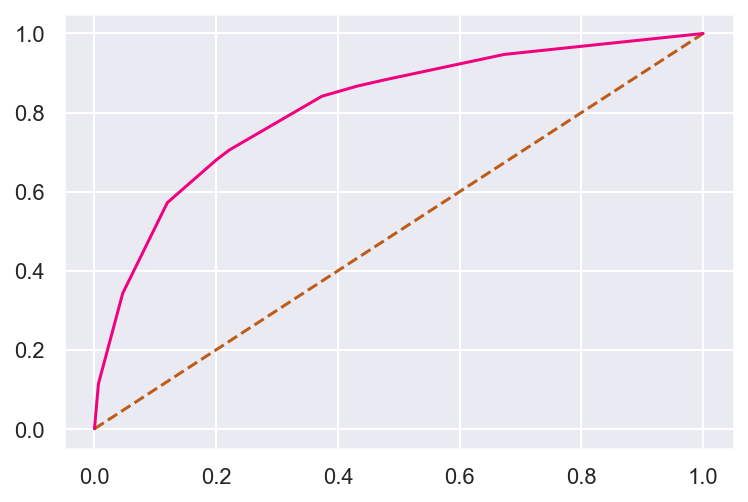

In [125]:
# predict probabilities
probs = best_grid.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--');
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr);
plt.savefig('cart_roc_curve_train.jpg', bbox_inches='tight');

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#239B56"> AUC and ROC of the Test Data

AUC: 0.787


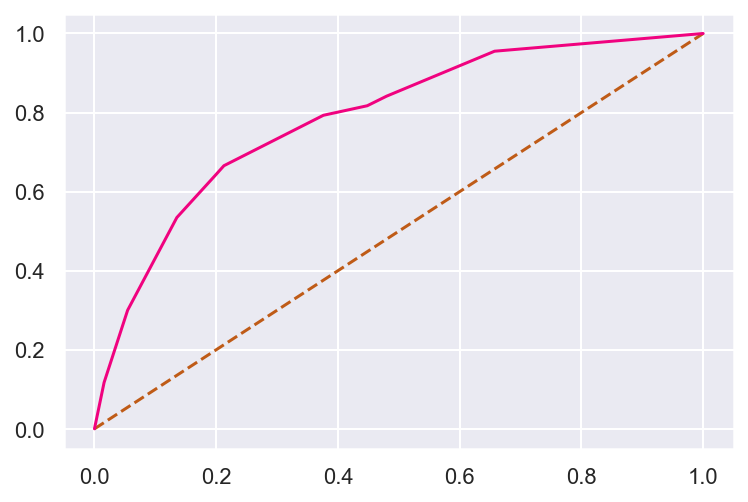

In [126]:
# predict probabilities
probs = best_grid.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--');
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr);
plt.savefig('cart_roc_curve_test.jpg', bbox_inches='tight');

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#D68910"> Confusion Matrix of CART Train Data

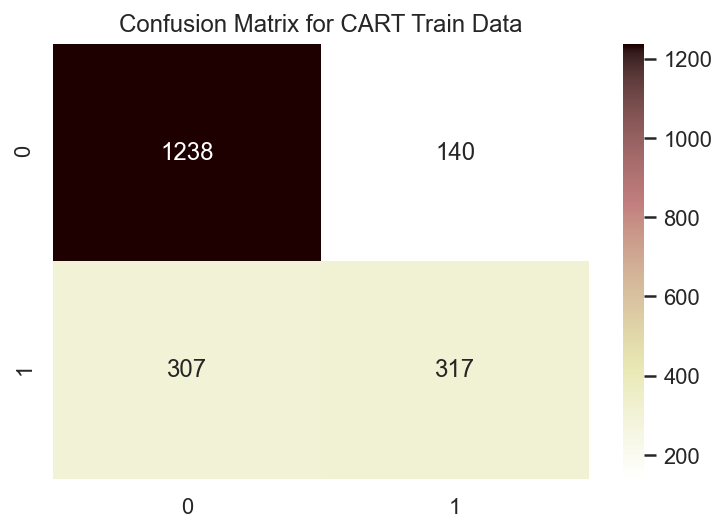

In [127]:
plt.title('Confusion Matrix for CART Train Data')
sns.heatmap(confusion_matrix(y_train, ytrain_predict), fmt='.0f' ,annot=True, cmap='pink_r');
plt.savefig('cart_confusion_train.jpg', bbox_inches='tight');

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#D68910"> Accuracy of CART Train Data

In [128]:
#Train Data Accuracy
cart_train_acc=best_grid.score(x_train,y_train) 
print('Accuracy for CART Train data =', round(cart_train_acc, 4))

Accuracy for CART Train data = 0.7842


### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#D68910"> Classification Matrix of CART Train Data

In [129]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1378
           1       0.69      0.51      0.59       624

    accuracy                           0.78      2002
   macro avg       0.75      0.70      0.72      2002
weighted avg       0.77      0.78      0.77      2002



In [130]:
cart_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
cr_cart_train=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(cr_cart_train.loc["1"][2],2)
cart_train_recall=round(cr_cart_train.loc["1"][1],2)
cart_train_precision=round(cr_cart_train.loc["1"][0],2)
print ('CART Train Precision =',cart_train_precision)
print ('CART Train Recall =',cart_train_recall)
print ('CART Train f1 =',cart_train_f1)

CART Train Precision = 0.69
CART Train Recall = 0.51
CART Train f1 = 0.59


In [131]:
cr_cart_train.to_csv('cart_cr_train.csv')
cr_cart_train

,precision,recall,f1-score,support
0,0.801294,0.898403,0.847075,1378.000000
1,0.693654,0.508013,0.586494,624.000000
accuracy,0.776723,0.776723,0.776723,0.776723
macro avg,0.747474,0.703208,0.716784,2002.000000
weighted avg,0.767744,0.776723,0.765855,2002.000000


### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#239B56"> Confusion Matrix of CART Test Data

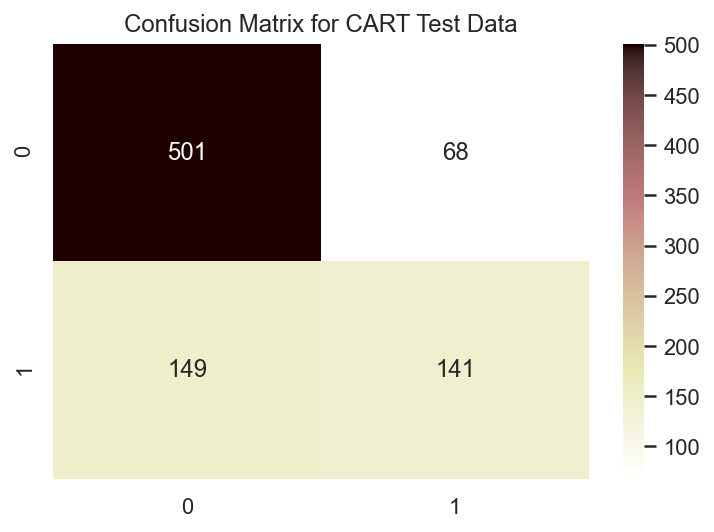

In [137]:
plt.title('Confusion Matrix for CART Test Data')
sns.heatmap(confusion_matrix(y_test, ytest_predict), fmt='.0f' ,annot=True, cmap='pink_r');
plt.savefig('cart_confusion_test.jpg', bbox_inches='tight');

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#239B56"> Accuracy of CART Test Data

In [133]:
#Test Data Accuracy
cart_test_acc=best_grid.score(x_test,y_test)
print('Accuracy of CART Test Data = ', round(cart_test_acc, 4))

Accuracy of CART Test Data =  0.7532


### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#239B56"> Classification Report of CART Test Data

In [134]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       569
           1       0.67      0.49      0.57       290

    accuracy                           0.75       859
   macro avg       0.72      0.68      0.69       859
weighted avg       0.74      0.75      0.74       859



In [135]:
cart_metrics=classification_report(y_test, ytest_predict,output_dict=True)
cr_cart_test=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(cr_cart_test.loc["1"][0],2)
cart_test_recall=round(cr_cart_test.loc["1"][1],2)
cart_test_f1=round(cr_cart_test.loc["1"][2],2)
print ('CART Test Precision =',cart_test_precision)
print ('CART Test Recall =',cart_test_recall)
print ('CART Test f1 =',cart_test_f1)

CART Test Precision = 0.67
CART Test Recall = 0.49
CART Test f1 = 0.57


In [136]:
cr_cart_test.to_csv('cart_cr_test.csv')
cr_cart_test

,precision,recall,f1-score,support
0,0.770769,0.880492,0.821985,569.000000
1,0.674641,0.486207,0.565130,290.000000
accuracy,0.747381,0.747381,0.747381,0.747381
macro avg,0.722705,0.683349,0.693558,859.000000
weighted avg,0.738316,0.747381,0.735271,859.000000


### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> CART Conclusion

**Train Data:**
    
    AUC: 81.3%        
    Accuracy: 78.42%             
    Precision: 68% 
    Recall: 57%
    f1-Score: 62%       
            
**Test Data:**
    
    AUC: 78.7%      
    Accuracy: 75.32%         
    Precision: 67% 
    Recall: 53%
    f1-Score: 59%     
  
* Training and Test set results are almost similar - hence consistent
* But the overall numbers are not great
* This is not such a good model to predict if Tourists would Claim or Not Claim Insurance
* `Agency_Code` i.e which Agency books the tour matters the most - This is the most important variable for prediction

===================================================================================================================


### <span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#D35404"> Build RANDOM FOREST - Random Forest Classifier Model

In [50]:
rfcl = RandomForestClassifier(random_state=0)

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Hyper Parameter Tuning - Using GridSearchCV

* Doing a GridSearch to choose the optimum values of the parameters
* There are many parameters to choose from, so to save computational power, choosing at max 3 values for each parameter
* Doing multile GridSearch over different sets of values
* Over 5 Cross Folds

In [67]:
param_grid = {
    'max_depth': [6, 8, 10],                 ## 4, 6, 8, 10, 12, 
    'max_features': [2, 3, 4],               ## 2, 3, 4, 5, 6
    'min_samples_leaf': [5 ,10, 15],         ## 5, 10 ,15, 20, 30, 50, 60,100
    'min_samples_split': [30, 50, 100],      ## 30, 50, 60,70, 100
    'n_estimators': [100, 200, 300]          ## 100,200, 300
}

In [68]:
grid_search = GridSearchCV(estimator=rfcl, param_grid=param_grid, verbose=True, cv=5)

In [69]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1215 out of 1215 | elapsed:  8.7min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [6, 8, 10], 'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [30, 50, 100],
                         'n_estimators': [100, 200, 300]},
             verbose=True)

In [70]:
print(grid_search.best_params_)

{'max_depth': 8, 'max_features': 2, 'min_samples_leaf': 5, 'min_samples_split': 30, 'n_estimators': 200}


### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Fitting the Classifier with Best Parameters

In [179]:
# best_grid = grid_search.best_estimator_
# best_grid

best_grid = RandomForestClassifier(max_depth=8, max_features=2, min_samples_leaf=5, min_samples_split=30, n_estimators=200, random_state=0)
best_grid.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, max_features=2, min_samples_leaf=5,
                       min_samples_split=30, n_estimators=200, random_state=0)

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Feature Importance

In [180]:
features = pd.DataFrame((best_grid.feature_importances_)*100, columns = ['Importance in %'], index=x_train.columns)

In [181]:
features

,Importance in %
Age,6.455323
Agency_Code,21.079825
Type,6.427275
Commision,15.339624
Channel,0.605874
Duration,10.719646
Sales,18.427723
Product Name,19.386991
Destination,1.557718


In [182]:
features = features.sort_values('Importance in %', ascending=False)
features

,Importance in %
Agency_Code,21.079825
Product Name,19.386991
Sales,18.427723
Commision,15.339624
Duration,10.719646
Age,6.455323
Type,6.427275
Destination,1.557718
Channel,0.605874


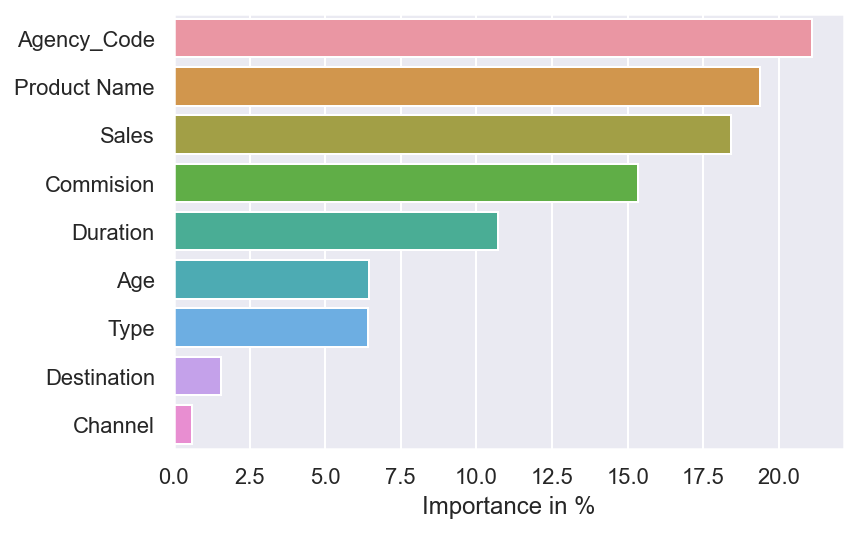

In [183]:
sns.barplot(y=features.index, x=features['Importance in %']);

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Predicting on Training and Test Data

In [184]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Predicted Classes and their Probabilities

In [185]:
ytest_predict_prob=best_grid.predict_proba(x_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.445235,0.554765
1,0.908136,0.091864
2,0.272011,0.727989
3,0.693892,0.306108
4,0.423117,0.576883


### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> RF Model Evaluation

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#D68910"> AUC and ROC of the TRAIN data

AUC: 0.866


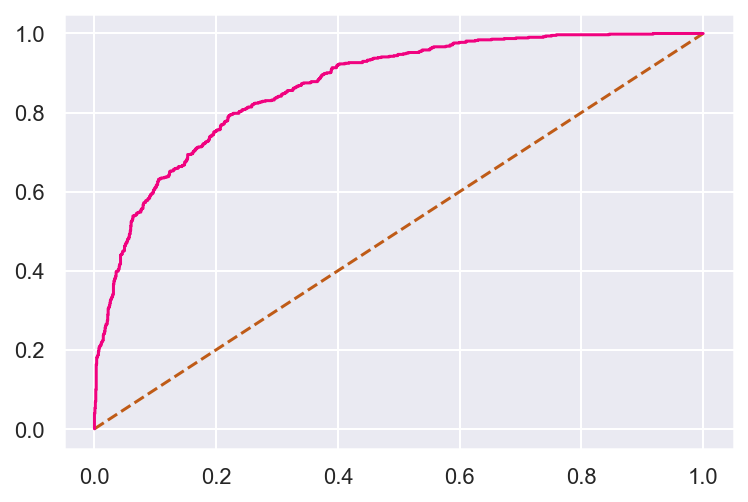

In [186]:
# predict probabilities
probs = best_grid.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rf_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % rf_train_auc)
# calculate roc curve
rf_train_fpr, rf_train_tpr, rf_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--');
# plot the roc curve for the model
plt.plot(rf_train_fpr, rf_train_tpr);

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#239B56"> AUC and ROC of the Test Data

AUC: 0.796


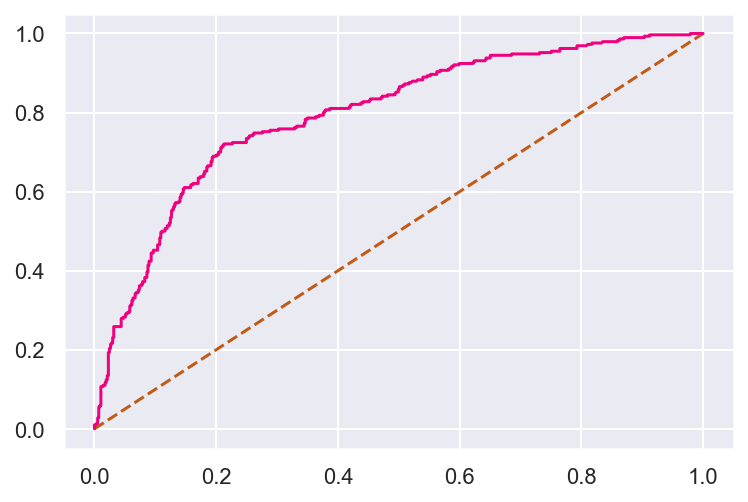

In [187]:
# predict probabilities
probs = best_grid.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rf_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % rf_test_auc)
# calculate roc curve
rf_test_fpr, rf_test_tpr, rf_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--');
# plot the roc curve for the model
plt.plot(rf_test_fpr, rf_test_tpr);

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#D68910"> Confusion Matrix of RF Train Data

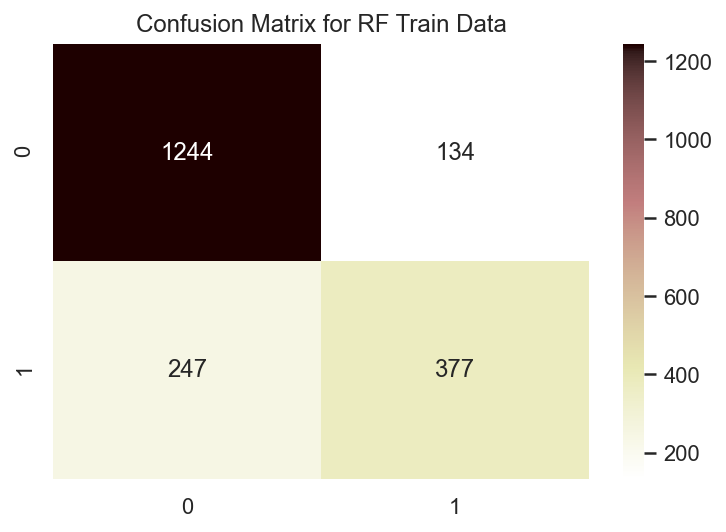

In [188]:
plt.title('Confusion Matrix for RF Train Data')
sns.heatmap(confusion_matrix(y_train, ytrain_predict), fmt='.0f' ,annot=True, cmap='pink_r');

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#D68910"> Accuracy of RF Train Data

In [189]:
#Train Data Accuracy
rf_train_acc=best_grid.score(x_train,y_train) 
print('Accuracy for RF Train data =', round(rf_train_acc, 4))

Accuracy for RF Train data = 0.8097


### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#D68910"> Classification Matrix of RF Train Data

In [190]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1378
           1       0.74      0.60      0.66       624

    accuracy                           0.81      2002
   macro avg       0.79      0.75      0.77      2002
weighted avg       0.80      0.81      0.80      2002



In [191]:
rf_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
cr_rf_train=pd.DataFrame(rf_metrics).transpose()
rf_train_f1=round(cr_rf_train.loc["1"][2],2)
rf_train_recall=round(cr_rf_train.loc["1"][1],2)
rf_train_precision=round(cr_rf_train.loc["1"][0],2)
print ('RF Train Precision =',rf_train_precision)
print ('RF Train Recall =',rf_train_recall)
print ('RF Train f1 =',rf_train_f1)

RF Train Precision = 0.74
RF Train Recall = 0.6
RF Train f1 = 0.66


In [192]:
cr_rf_train

,precision,recall,f1-score,support
0,0.834339,0.902758,0.867201,1378.00000
1,0.737769,0.604167,0.664317,624.00000
accuracy,0.809690,0.809690,0.809690,0.80969
macro avg,0.786054,0.753462,0.765759,2002.00000
weighted avg,0.804240,0.809690,0.803965,2002.00000


### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#239B56"> Confusion Matrix of RF Test Data

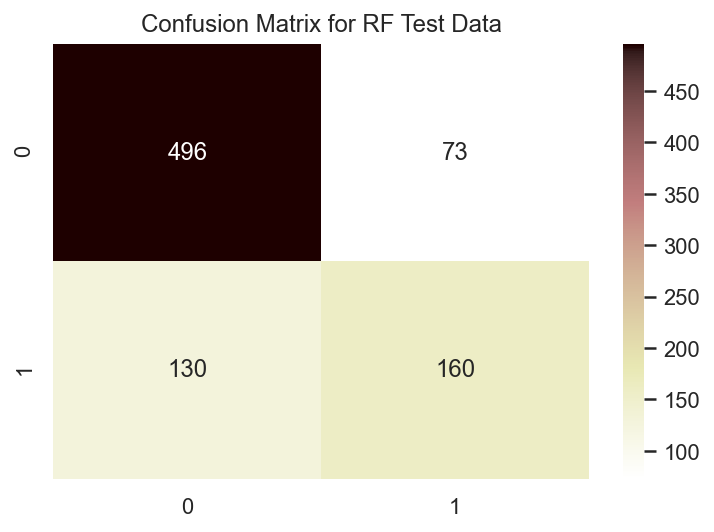

In [198]:
plt.title('Confusion Matrix for RF Test Data')
sns.heatmap(confusion_matrix(y_test, ytest_predict), fmt='.0f' ,annot=True, cmap='pink_r');
plt.savefig('rf_confusion_test.jpg', bbox_inches='tight');

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#239B56"> Accuracy of RF Test Data

In [194]:
#Test Data Accuracy
rf_test_acc=best_grid.score(x_test,y_test)
print('Accuracy of RF Test Data = ', round(rf_test_acc, 4))

Accuracy of RF Test Data =  0.7637


### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#239B56"> Classification Report of RF Test Data

In [195]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       569
           1       0.69      0.55      0.61       290

    accuracy                           0.76       859
   macro avg       0.74      0.71      0.72       859
weighted avg       0.76      0.76      0.76       859



In [196]:
rf_metrics=classification_report(y_test, ytest_predict,output_dict=True)
cr_rf_test=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(cr_rf_test.loc["1"][0],2)
rf_test_recall=round(cr_rf_test.loc["1"][1],2)
rf_test_f1=round(cr_rf_test.loc["1"][2],2)
print ('RF Test Precision =',rf_test_precision)
print ('RF Test Recall =',rf_test_recall)
print ('RF Test f1 =',rf_test_f1)

RF Test Precision = 0.69
RF Test Recall = 0.55
RF Test f1 = 0.61


In [197]:
cr_rf_test

,precision,recall,f1-score,support
0,0.792332,0.871705,0.830126,569.000000
1,0.686695,0.551724,0.611855,290.000000
accuracy,0.763679,0.763679,0.763679,0.763679
macro avg,0.739514,0.711714,0.720990,859.000000
weighted avg,0.756669,0.763679,0.756437,859.000000


### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> RF Conclusion

**Train Data:**
    
    AUC: 86.6%        
    Accuracy: 80.97%             
    Precision: 74% 
    Recall: 60%
    f1-Score: 66%       
            
**Test Data:**
    
    AUC: 79.6%      
    Accuracy: 76.37%         
    Precision: 69% 
    Recall: 55%
    f1-Score: 61%     
    
* Training and Test set results are almost similar - hence consistent
* Overall numbers could be better - Recall for 1(Claimed) could be better
* This is a fairly good model to predict if Tourists would Claim or Not Claim Insurance
* `Agency_Code` i.e which Agency books the tour, again matters the most - This is the most important variable for prediction
* `Product_Name` & `Sales` are also close 2nd and 3rd most Important Feature.


* This is clearly a better model than CART

===================================================================================================================


### <span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#D35404"> Build ARTIFICIAL NEURAL NETWORK - MLP Classifier Model

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Outlier Treatment

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#D68910"> Check for Outliers in Original Dataset

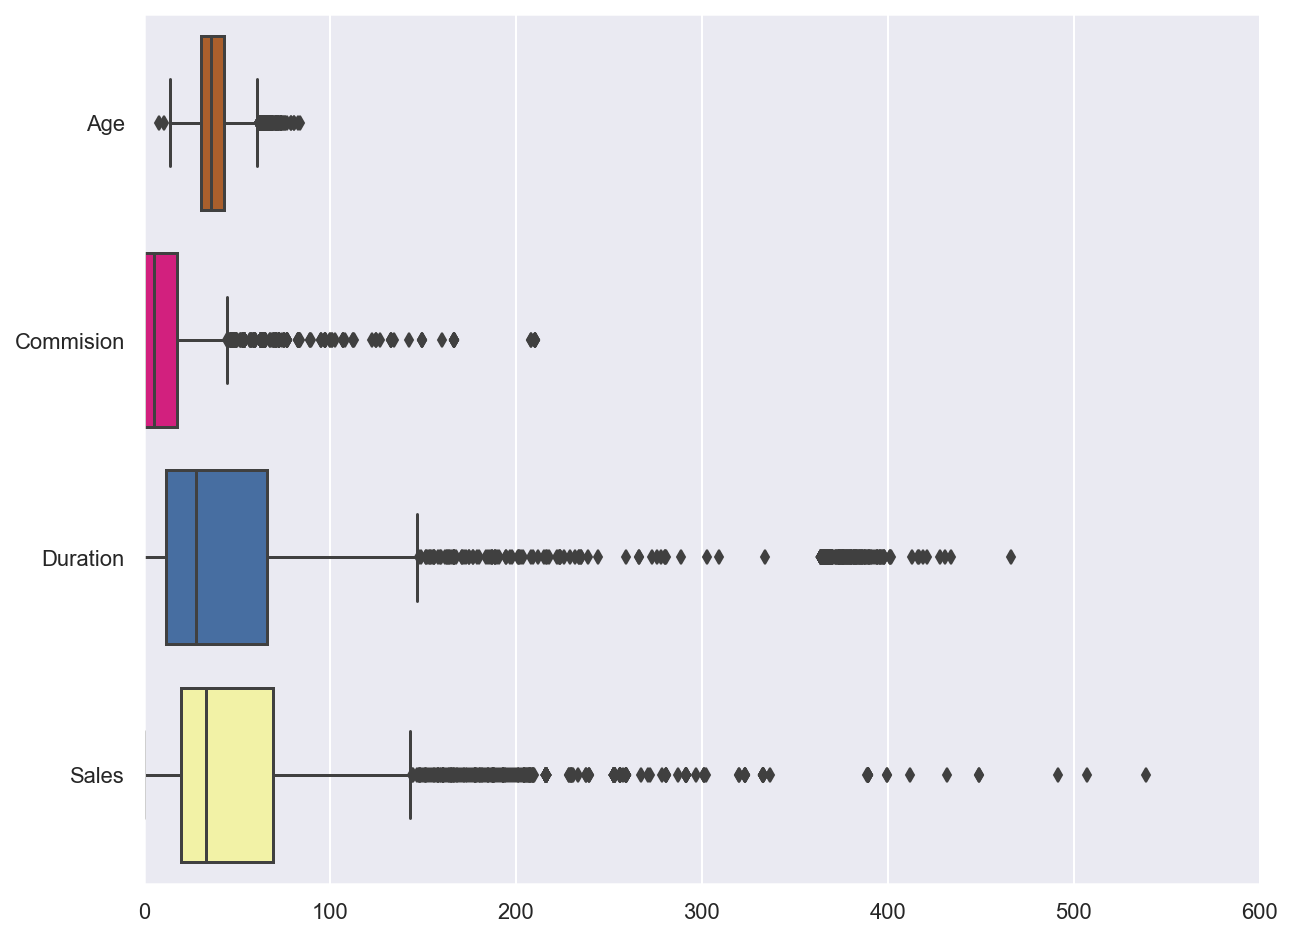

In [199]:
plt.figure(figsize=[10,8])
plt.xlim(0,600)
sns.boxplot(data=ins, orient='h');

* There are many Outliers
* We decided to not treat Outliers for CART and RF Modelling as they are not sensitive to them
* But, ANN is sensitive to Outliers as Scaling is necessary here


* Hence, Lets treat Outliers by IQR (Keeping Whisker Length = 1.5)

In [200]:
# Outlier treatment :  define a custom function- 
# If for a particular column the max value is greater than the Upper end of the Whisker
# Then, assign Upper End of the Whisker to the max value

# Use the Same Logic for the min value

# Upper end of Whisker = Q3 + 1.5*IQR
# Lower End of Whisker = Q1 - 1.5*IQR

col1 = cont
def remove_outlier(col1):
    sorted(col1)
    Q1,Q3=col1.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range    

In [201]:
cont

['Age', 'Commision', 'Duration', 'Sales']

In [202]:
# Treating outliers for every Column

ins_out = ins.copy()
for i in range(0, len(col1)):
    lr,ur=remove_outlier(ins_out[col1[i]])
    ins_out[col1[i]]=np.where(ins_out[col1[i]]>ur, ur, ins_out[col1[i]])
    ins_out[col1[i]]=np.where(ins_out[col1[i]]<lr, lr, ins_out[col1[i]])

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#D68910"> Check for Outliers in Treated Dataset (ins_out)

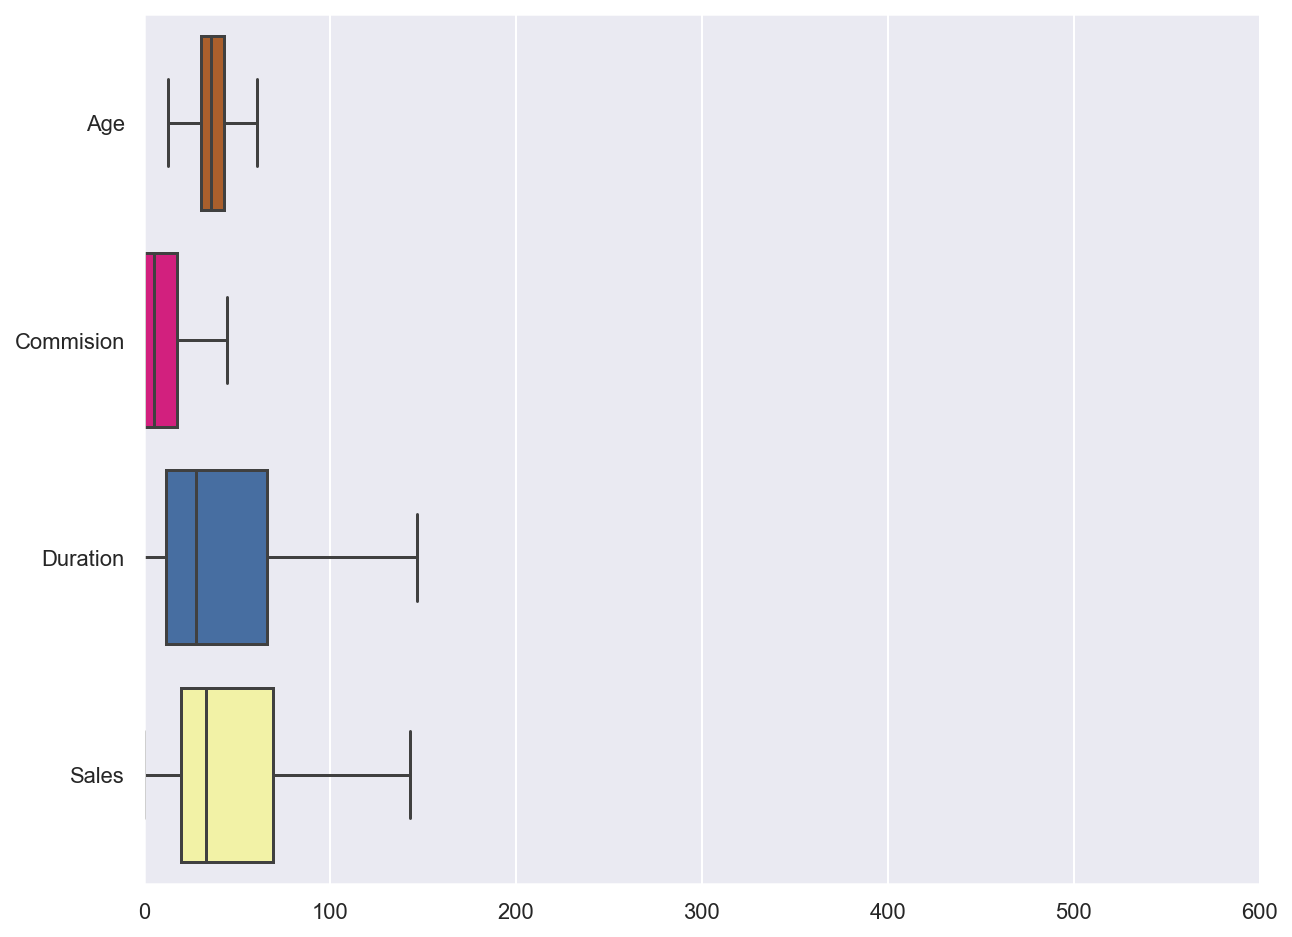

In [203]:
plt.figure(figsize=[10,8])
plt.xlim(0,600)
sns.boxplot(data=ins_out, orient='h');

* We can see that all Numeric Variables are treated for Outliers by IQR method
* Now we are ready for Scaling

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Convert all Variables to Codes (Data Encoding of Outlier Treated Data)

In [204]:
coded_ins_out = ins_out.copy()
for feature in coded_ins_out.columns: 
    if coded_ins_out[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(coded_ins_out[feature].unique()))
        print(pd.Categorical(coded_ins_out[feature].unique()).codes)
        coded_ins_out[feature] = pd.Categorical(coded_ins[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [205]:
coded_ins_out.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0,0,0,0.70,1,7.0,2.51,2,0
1,36.0,2,1,0,0.00,1,34.0,20.00,2,0
2,39.0,1,1,0,5.94,1,3.0,9.90,2,1
3,36.0,2,1,0,0.00,1,4.0,26.00,1,0
4,33.0,3,0,0,6.30,1,53.0,18.00,0,0


In [206]:
coded_ins_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   float64
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   float64
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(4), int8(6)
memory usage: 128.5 KB



### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Assigning Dependent and Independent Variables

In [207]:
x = coded_ins_out.drop('Claimed', axis=1)
y = coded_ins_out['Claimed']

In [208]:
x.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0,0,0.70,1,7.0,2.51,2,0
1,36.0,2,1,0.00,1,34.0,20.00,2,0
2,39.0,1,1,5.94,1,3.0,9.90,2,1
3,36.0,2,1,0.00,1,4.0,26.00,1,0
4,33.0,3,0,6.30,1,53.0,18.00,0,0


In [209]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Claimed, dtype: int8


### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Train and Test Split

In [210]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [211]:
print('Dimension of X Train Data :', x_train.shape)
print('Dimension of X Test Data :', x_test.shape)
print('')
print('Dimension of Y Train Data :', y_train.shape)
print('Dimension of Y Test Data :', y_test.shape)

Dimension of X Train Data : (2002, 9)
Dimension of X Test Data : (859, 9)

Dimension of Y Train Data : (2002,)
Dimension of Y Test Data : (859,)


### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Scaling (Standard Scaler)

In [212]:
sc = StandardScaler()

In [213]:
x_train = sc.fit_transform(x_train)    ## Train data - Fit and Transform
x_test = sc.transform(x_test)          ## Test data - Transform only NO fit

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Define MLPClassifier

In [105]:
mlp = MLPClassifier()

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Hyper Parameter Tuning - Using GridSearchCV

* Doing a GridSearch to choose the optimum values of the parameters
* There are many parameters to choose from, so to save computational power, choosing at max 3 values for each parameter
* Doing multile GridSearch over different sets of values
* Over 5 & 10 Cross Folds

In [106]:
param_grid = {
    'hidden_layer_sizes': [(100,100,100), (300,300,300), 
                           300, 500],                         ## (100,100,100), 300, 500, 100, (300,300,300)
    'activation': ['relu'],                                   ## logistic, relu
    'solver': ['sgd'],                                        ## sgd, adam
    'tol': [0.001, 0.0001],                                   ## 0.01, 0.001, 0.0001
    'max_iter' : [10000]                                      ## 5000, 10000
}

In [107]:
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, verbose=True, cv=10)

In [108]:
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  6.8min finished


GridSearchCV(cv=10, estimator=MLPClassifier(),
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [(100, 100, 100),
                                                (300, 300, 300), 300, 500],
                         'max_iter': [10000], 'solver': ['sgd'],
                         'tol': [0.001, 0.0001]},
             verbose=True)

In [109]:
print(grid_search.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': (300, 300, 300), 'max_iter': 10000, 'solver': 'sgd', 'tol': 0.0001}


### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Fitting the Classifier with Best Parameters

In [214]:
# best_grid = grid_search.best_estimator_
# best_grid

best_grid = MLPClassifier(hidden_layer_sizes=(300, 300, 300), max_iter=10000, solver='sgd')
best_grid.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(300, 300, 300), max_iter=10000, solver='sgd')

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Predicting on Training and Test Data

In [215]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Predicted Classes and their Probabilities

In [216]:
ytest_predict_prob=best_grid.predict_proba(x_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.302599,0.697401
1,0.904045,0.095955
2,0.240537,0.759463
3,0.754158,0.245842
4,0.395936,0.604064


### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> ANN Model Evaluation

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#D68910"> AUC and ROC of the TRAIN data

AUC: 0.829


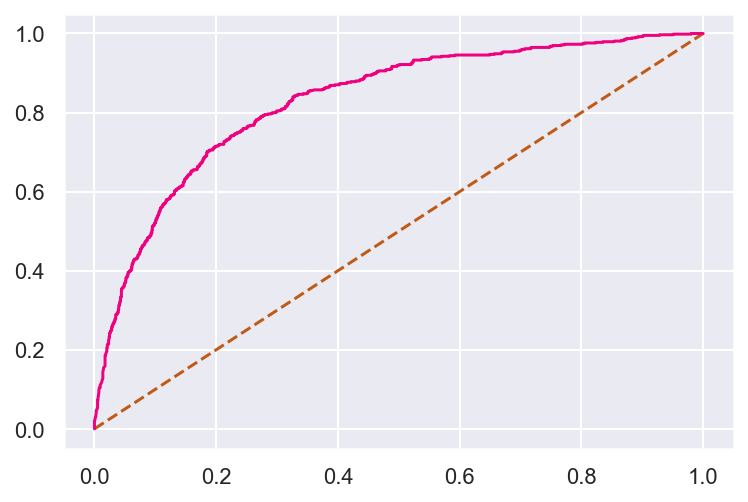

In [217]:
# predict probabilities
probs = best_grid.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
nn_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % nn_train_auc)
# calculate roc curve
nn_train_fpr, nn_train_tpr, nn_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--');
# plot the roc curve for the model
plt.plot(nn_train_fpr, nn_train_tpr);
plt.savefig('nn_roc_train.jpg', bbox_inches='tight');

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#239B56"> AUC and ROC of the Test Data

AUC: 0.798


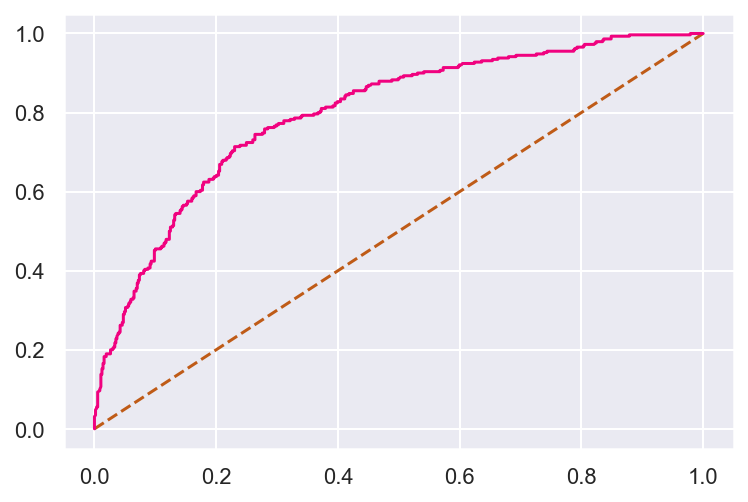

In [218]:
# predict probabilities
probs = best_grid.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
nn_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % nn_test_auc)
# calculate roc curve
nn_test_fpr, nn_test_tpr, nn_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--');
# plot the roc curve for the model
plt.plot(nn_test_fpr, nn_test_tpr);
plt.savefig('nn_roc_test.jpg', bbox_inches='tight');

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#D68910"> Confusion Matrix of ANN Train Data

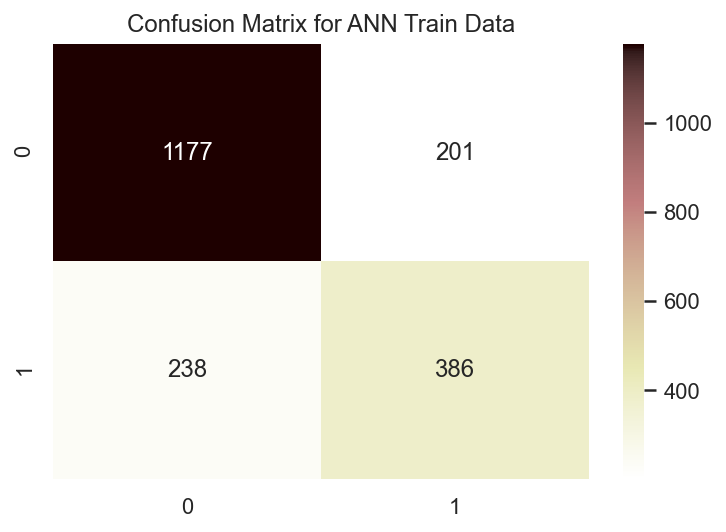

In [219]:
plt.title('Confusion Matrix for ANN Train Data')
sns.heatmap(confusion_matrix(y_train, ytrain_predict), fmt='.0f' ,annot=True, cmap='pink_r');
plt.savefig('nn_confusion_train.jpg', bbox_inches='tight');

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#D68910"> Accuracy of ANN Train Data

In [220]:
#Train Data Accuracy
nn_train_acc=best_grid.score(x_train,y_train) 
print('Accuracy for ANN Train data =', round(nn_train_acc, 4))

Accuracy for ANN Train data = 0.7807


### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#D68910"> Classification Matrix of ANN Train Data

In [221]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1378
           1       0.66      0.62      0.64       624

    accuracy                           0.78      2002
   macro avg       0.74      0.74      0.74      2002
weighted avg       0.78      0.78      0.78      2002



In [222]:
nn_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
cr_nn_train=pd.DataFrame(nn_metrics).transpose()
nn_train_f1=round(cr_nn_train.loc["1"][2],2)
nn_train_recall=round(cr_nn_train.loc["1"][1],2)
nn_train_precision=round(cr_nn_train.loc["1"][0],2)
print ('ANN Train Precision =',nn_train_precision)
print ('ANN Train Recall =',nn_train_recall)
print ('ANN Train f1 =',nn_train_f1)

ANN Train Precision = 0.66
ANN Train Recall = 0.62
ANN Train f1 = 0.64


In [223]:
cr_nn_train.to_csv('nn_cr_train.csv')

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#239B56"> Confusion Matrix of ANN Test Data

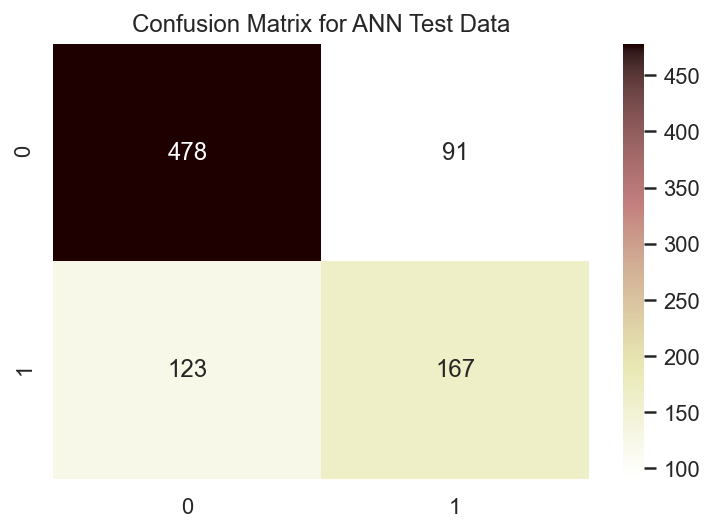

In [237]:
plt.title('Confusion Matrix for ANN Test Data')
sns.heatmap(confusion_matrix(y_test, ytest_predict), fmt='.0f' ,annot=True, cmap='pink_r');
plt.savefig('nn_confusion_test.jpg', bbox_inches='tight');

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#239B56"> Accuracy of ANN Test Data

In [225]:
#Test Data Accuracy
nn_test_acc=best_grid.score(x_test,y_test)
print('Accuracy of ANN Test Data = ', round(nn_test_acc, 4))

Accuracy of ANN Test Data =  0.7509


### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#239B56"> Classification Report of ANN Test Data

In [226]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       569
           1       0.65      0.58      0.61       290

    accuracy                           0.75       859
   macro avg       0.72      0.71      0.71       859
weighted avg       0.75      0.75      0.75       859



In [227]:
nn_metrics=classification_report(y_test, ytest_predict,output_dict=True)
cr_nn_test=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(cr_nn_test.loc["1"][0],2)
nn_test_recall=round(cr_nn_test.loc["1"][1],2)
nn_test_f1=round(cr_nn_test.loc["1"][2],2)
print ('ANN Test Precision =',nn_test_precision)
print ('ANN Test Recall =',nn_test_recall)
print ('ANN Test f1 =',nn_test_f1)

ANN Test Precision = 0.65
ANN Test Recall = 0.58
ANN Test f1 = 0.61


In [228]:
cr_nn_test.to_csv('nn_cr_test.csv')

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> ANN Conclusion

**Train Data:**
    
    AUC: 82.9%        
    Accuracy: 78.87%             
    Precision: 6669% 
    Recall: 62%
    f1-Score: 64%       
            
**Test Data:**
    
    AUC: 79.8%      
    Accuracy: 75.09%         
    Precision: 65% 
    Recall: 58%
    f1-Score: 61%     
    
* Training and Test set results are almost similar - hence consistent
* Overall numbers could be better - Recall for 1(Claimed) could be better
* This is a fairly good model to predict if Tourists would Claim or Not Claim Insurance

===================================================================================================================

===================================================================================================================


### <span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#D35404"> Final Conclusion - Comparision of 3 Models

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Comparision Metrics of 3 Models

In [234]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)
data.to_csv('all3_comparision.csv')

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.78,0.75,0.81,0.76,0.78,0.75
AUC,0.81,0.79,0.87,0.80,0.83,0.80
Recall,0.51,0.49,0.60,0.55,0.62,0.58
Precision,0.69,0.67,0.74,0.69,0.66,0.65
F1 Score,0.59,0.57,0.66,0.61,0.64,0.61


### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> ROC Curve of 3 models on the TRAIN Data

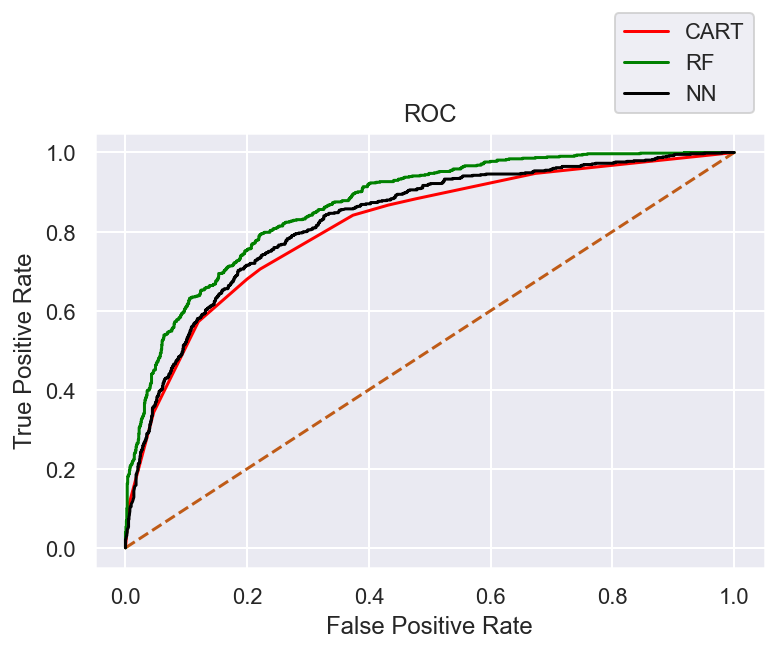

In [235]:
plt.plot([0, 1], [0, 1], linestyle='--');
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART");
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF");
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN");
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC');
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right');
plt.savefig('roc_all3_train.jpg', bbox_inches='tight');

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> ROC Curve of 3 models on the TEST Data

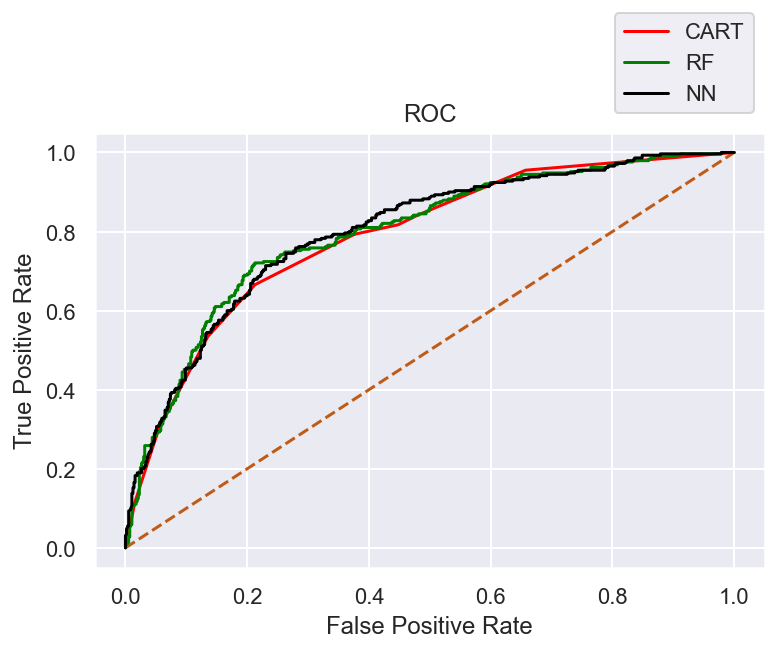

In [236]:
plt.plot([0, 1], [0, 1], linestyle='--');
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART");
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF");
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN");
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC');
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right');
plt.savefig('roc_all3_test.jpg', bbox_inches='tight');

* Out of the 3 models, Random Forest has slightly better performance than the CART and Neural network model

* Overall all the 3 models are reasonaly stable enough to be used for making any future predictions.

* From CART and Random Forest Model, the variable 'Agency_Code' is found to be the most useful feature amongst all other features for predicting if a person has claimed Insrance or not. 

* If a tourist has booked from the Agency_Code : 'C2B', then he is more likely to claim insurance.

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Check Agencies against Sales and Commision

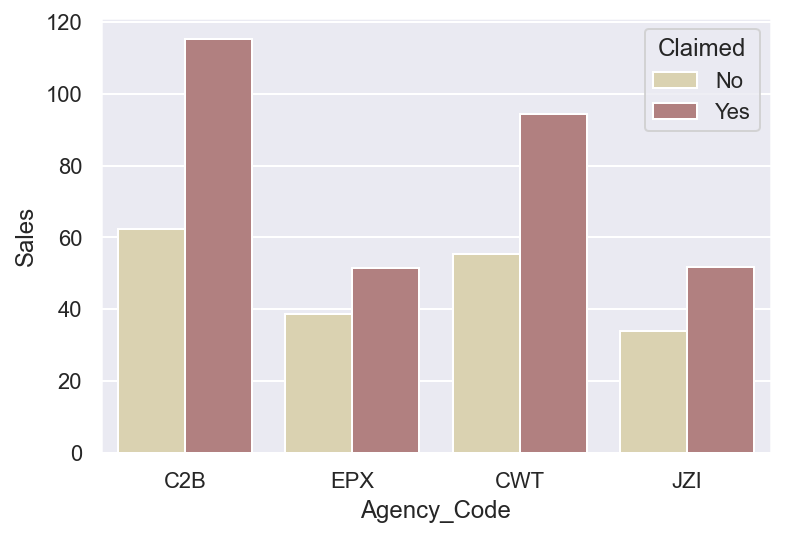

In [262]:
sns.barplot(x='Agency_Code', y='Sales', hue='Claimed',data=ins, palette='pink_r', ci=False);
plt.savefig('agency_sales_claimed.jpg', bbox_inches='tight');

In [ ]:
sns.barplot(x='Re', y='Sales', hue='Claimed',data=ins, palette='pink_r', ci=False);
plt.savefig('agency_sales_claimed.jpg', bbox_inches='tight');

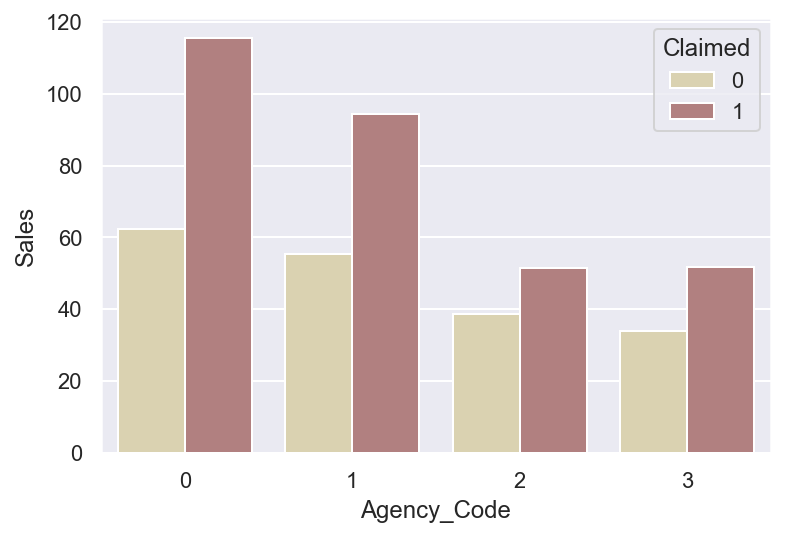

In [260]:
sns.barplot(x='Agency_Code', y='Sales', hue='Claimed',data=coded_ins, palette='pink_r', ci=False);
plt.savefig('coded_ins_agency_sales_claimed.jpg', bbox_inches='tight');

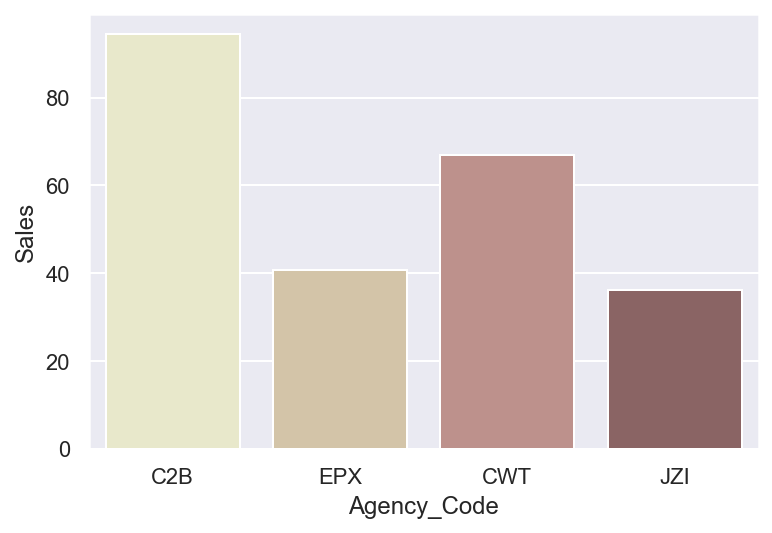

In [257]:
sns.barplot(x='Agency_Code', y='Sales',data=ins, palette='pink_r', ci=False);

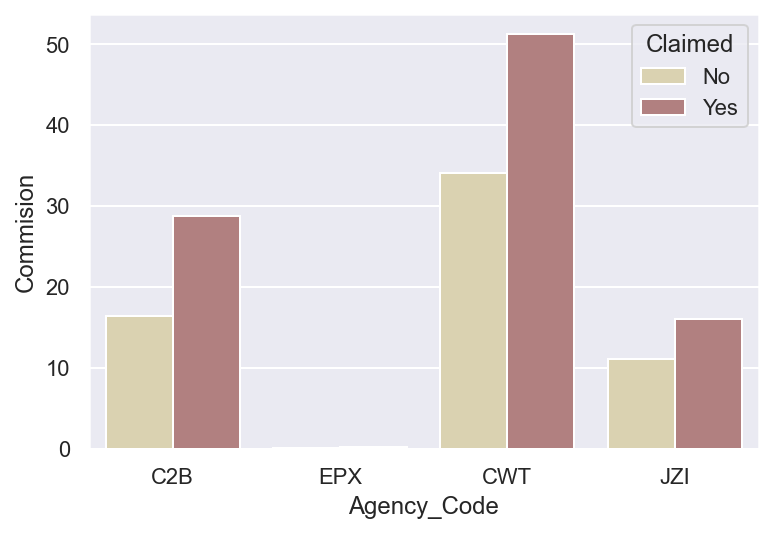

In [252]:
sns.barplot(x='Agency_Code', y='Commision', hue='Claimed',data=ins, palette='pink_r', ci=False);


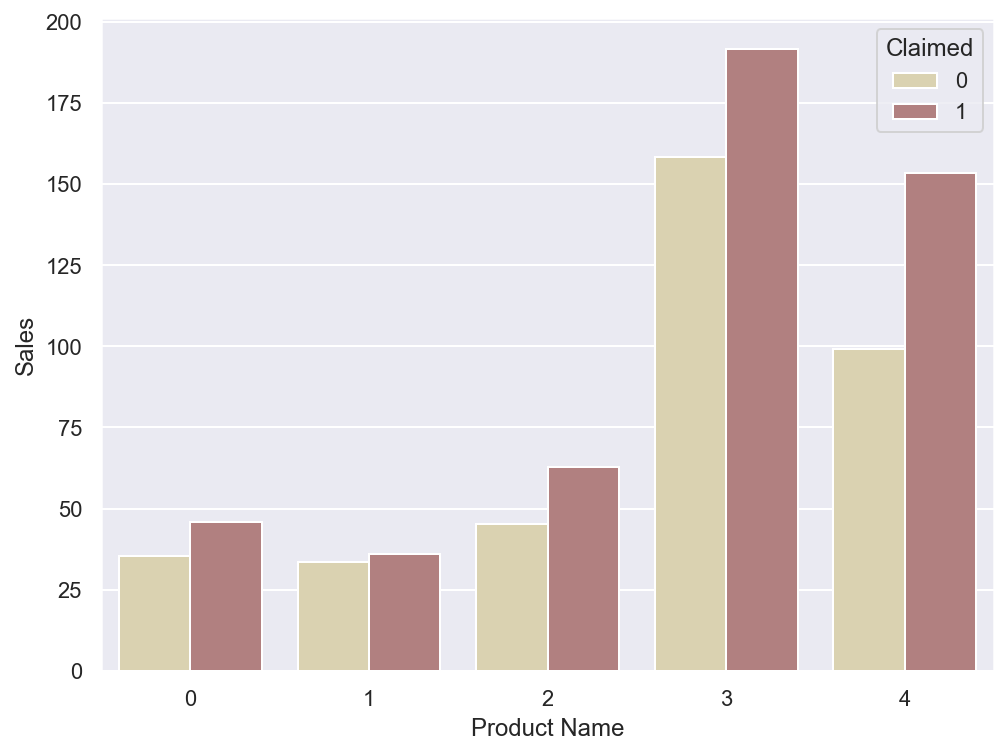

In [258]:
plt.figure(figsize=[8,6])
sns.barplot(x='Product Name', y='Sales', hue='Claimed',data=coded_ins, palette='pink_r', ci=False);


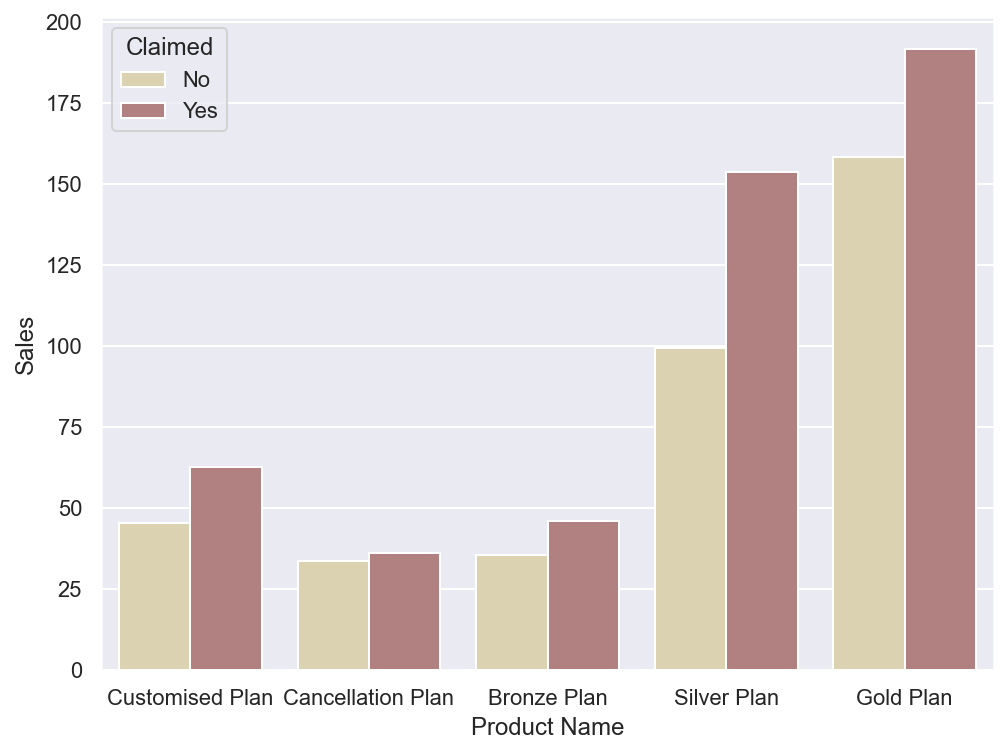

In [261]:
plt.figure(figsize=[8,6])
sns.barplot(x='Product Name', y='Sales', hue='Claimed',data=ins, palette='pink_r', ci=False);
plt.savefig('product_name_sales.jpg', bbox_inches='tight');